In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
retail = pd.read_csv('retail_data.csv')

# **Basic cleaning & Suitable Datatype Conversion**

In [47]:
retail.shape

(302010, 30)

In [48]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [49]:
# Drop rows with missing critical fields
critical = ['Transaction_ID', 'Customer_ID', 'Date', 'Amount']
retail = retail.dropna(subset=critical)

# Drop exact duplicate rows (across all columns)
retail = retail.drop_duplicates()

print("Rows after cleaning:", len(retail))

Rows after cleaning: 300651


In [50]:
retail.shape

(300651, 30)

In [51]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300651 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    300651 non-null  float64
 1   Customer_ID       300651 non-null  float64
 2   Name              300272 non-null  object 
 3   Email             300305 non-null  object 
 4   Phone             300290 non-null  float64
 5   Address           300339 non-null  object 
 6   City              300403 non-null  object 
 7   State             300375 non-null  object 
 8   Zipcode           300312 non-null  float64
 9   Country           300382 non-null  object 
 10  Age               300479 non-null  float64
 11  Gender            300335 non-null  object 
 12  Income            300361 non-null  object 
 13  Customer_Segment  300436 non-null  object 
 14  Date              300651 non-null  object 
 15  Year              300303 non-null  float64
 16  Month             300381 

In [52]:
retail.tail(5).T

302005                302006  \
Transaction_ID                 4246475.0             1197603.0   
Customer_ID                      12104.0               69772.0   
Name                        Meagan Ellis           Mathew Beck   
Email               Courtney60@gmail.com  Jennifer71@gmail.com   
Phone                       7466353743.0          5754304957.0   
Address           389 Todd Path Apt. 159     52809 Mark Forges   
City                          Townsville               Hanover   
State                    New South Wales                Berlin   
Zipcode                           4567.0               16852.0   
Country                        Australia               Germany   
Age                                 31.0                  35.0   
Gender                              Male                Female   
Income                            Medium                   Low   
Customer_Segment                 Regular                   New   
Date                           1/20/2024            12/28/2023   
Year                              2024.0                2023.0   
Month                            January              December   
Time                            23:40:29               2:55:45   
Total_Purchases                      5.0                   1.0   
Amount                        194.792597            285.137301   
Total_Amount                  973.962984            285.137301   
Product_Category                   Books           Electronics   
Product_Brand              Penguin Books                 Apple   
Product_Type                     Fiction                Laptop   
Feedback                             Bad             Excellent   
Shipping_Method                 Same-Day              Same-Day   
Payment_Method                      Cash                  Cash   
Order_Status                  Processing            Processing   
Ratings                              1.0                   5.0   
products              Historical fiction               LG Gram   

                                        302007               302008  \
Transaction_ID                       7743242.0            9301950.0   
Customer_ID                            28449.0              45477.0   
Name                                Daniel Lee       Patrick Wilson   
Email                 Christopher100@gmail.com  Rebecca65@gmail.com   
Phone                             9382530370.0         9373222023.0   
Address           407 Aaron Crossing Suite 495      3204 Baird Port   
City                                  Brighton              Halifax   
State                                  England              Ontario   
Zipcode                                88038.0              67608.0   
Country                                     UK               Canada   
Age                                       41.0                 41.0   
Gender                                    Male                 Male   
Income                                     Low               Medium   
Customer_Segment                       Premium                  New   
Date                                 2/27/2024             09-03-23   
Year                                    2024.0               2023.0   
Month                                 February            September   
Time                                   2:43:49             11:20:31   
Total_Purchases                            3.0                  1.0   
Amount                               60.701761           120.834784   
Total_Amount                        182.105285           120.834784   
Product_Category                      Clothing           Home Decor   
Product_Brand                           Adidas                 IKEA   
Product_Type                            Jacket            Furniture   
Feedback                               Average                 Good   
Shipping_Method                        Express             Standard   
Payment_Method                            Cash                 Cash   

In [53]:
# date, time to datetime
# year to int
# ID to string

In [54]:
import re

def fix_year(date_str):
    if pd.isna(date_str):
        return date_str

    # normalize separators to /
    date_str = str(date_str).strip().replace('-', '/')

    # match mm/dd/yy (2-digit year)
    match = re.match(r'^(\d{1,2})/(\d{1,2})/(\d{2})$', date_str)
    if match:
        m, d, y = match.groups()
        y = int(y)
        # 00–30 → 2000–2030, else → 1900s
        y = 2000 + y if y <= 30 else 1900 + y
        return f"{m}/{d}/{y}"

    return date_str

# Apply the fix
retail['Date'] = retail['Date'].apply(fix_year)

# Parse into datetime
retail['Date'] = pd.to_datetime(retail['Date'], errors='coerce', format='%m/%d/%Y')


In [55]:
retail['Time'] = pd.to_datetime(retail['Date'].dt.strftime('%m/%d/%Y') + ' ' + retail['Time'].astype(str),format='%m/%d/%Y %H:%M:%S',errors='coerce')

In [56]:
retail['Year'] = pd.to_numeric(retail['Year'], errors='coerce').astype('Int64')

In [57]:
retail['Transaction_ID'] = retail['Transaction_ID'].apply(lambda x: str(x).split('.')[0] if pd.notna(x) else None)
retail['Customer_ID'] = retail['Customer_ID'].apply(lambda x: str(x).split('.')[0] if pd.notna(x) else None)
retail['Phone'] = retail['Phone'].apply(lambda x: str(x).split('.')[0] if pd.notna(x) else None)
retail['Zipcode'] = retail['Zipcode'].apply(lambda x: str(x).split('.')[0] if pd.notna(x) else None)

In [58]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300651 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    300651 non-null  object        
 1   Customer_ID       300651 non-null  object        
 2   Name              300272 non-null  object        
 3   Email             300305 non-null  object        
 4   Phone             300290 non-null  object        
 5   Address           300339 non-null  object        
 6   City              300403 non-null  object        
 7   State             300375 non-null  object        
 8   Zipcode           300312 non-null  object        
 9   Country           300382 non-null  object        
 10  Age               300479 non-null  float64       
 11  Gender            300335 non-null  object        
 12  Income            300361 non-null  object        
 13  Customer_Segment  300436 non-null  object        
 14  Date     

In [59]:
retail.head(5).T

0                    1  \
Transaction_ID                8691788              2174773   
Customer_ID                     37249                69749   
Name              Michelle Harrington          Kelsey Hill   
Email               Ebony39@gmail.com     Mark36@gmail.com   
Phone                      1414786801           6852899987   
Address             3959 Amanda Burgs   82072 Dawn Centers   
City                         Dortmund           Nottingham   
State                          Berlin              England   
Zipcode                         77985                99071   
Country                       Germany                   UK   
Age                              21.0                 19.0   
Gender                           Male               Female   
Income                            Low                  Low   
Customer_Segment              Regular              Premium   
Date              2023-09-18 00:00:00  2023-12-31 00:00:00   
Year                             2023                 2023   
Month                       September             December   
Time              2023-09-18 22:03:55  2023-12-31 08:42:04   
Total_Purchases                   3.0                  2.0   
Amount                     108.028757           403.353907   
Total_Amount                324.08627           806.707815   
Product_Category             Clothing          Electronics   
Product_Brand                    Nike              Samsung   
Product_Type                   Shorts               Tablet   
Feedback                    Excellent            Excellent   
Shipping_Method              Same-Day             Standard   
Payment_Method             Debit Card          Credit Card   
Order_Status                  Shipped           Processing   
Ratings                           5.0                  4.0   
products               Cycling shorts           Lenovo Tab   

                                    2                            3  \
Transaction_ID                6679610                      7232460   
Customer_ID                     30192                        62101   
Name                     Scott Jensen                Joseph Miller   
Email               Shane85@gmail.com             Mary34@gmail.com   
Phone                      8362160449                   2776751724   
Address             4133 Young Canyon  8148 Thomas Creek Suite 100   
City                          Geelong                     Edmonton   
State                 New South Wales                      Ontario   
Zipcode                         75929                        88420   
Country                     Australia                       Canada   
Age                              48.0                         56.0   
Gender                           Male                         Male   
Income                            Low                         High   
Customer_Segment              Regular                      Premium   
Date              2023-04-26 00:00:00          2023-05-08 00:00:00   
Year                             2023                         2023   
Month                           April                          May   
Time              2023-04-26 04:06:29          2023-05-08 14:55:17   
Total_Purchases                   3.0                          7.0   
Amount                       354.4776                   352.407717   
Total_Amount              1063.432799                  2466.854021   
Product_Category                Books                   Home Decor   
Product_Brand           Penguin Books                   Home Depot   
Product_Type               Children's                        Tools   
Feedback                      Average                    Excellent   
Shipping_Method              Same-Day                     Standard   
Payment_Method            Credit Card                       PayPal   
Order_Status               Processing                   Processing   
Ratings                           2.0                          4.0   
products     

In [60]:
retail.tail(5).T

302005                302006  \
Transaction_ID                   4246475               1197603   
Customer_ID                        12104                 69772   
Name                        Meagan Ellis           Mathew Beck   
Email               Courtney60@gmail.com  Jennifer71@gmail.com   
Phone                         7466353743            5754304957   
Address           389 Todd Path Apt. 159     52809 Mark Forges   
City                          Townsville               Hanover   
State                    New South Wales                Berlin   
Zipcode                             4567                 16852   
Country                        Australia               Germany   
Age                                 31.0                  35.0   
Gender                              Male                Female   
Income                            Medium                   Low   
Customer_Segment                 Regular                   New   
Date                 2024-01-20 00:00:00   2023-12-28 00:00:00   
Year                                2024                  2023   
Month                            January              December   
Time                 2024-01-20 23:40:29   2023-12-28 02:55:45   
Total_Purchases                      5.0                   1.0   
Amount                        194.792597            285.137301   
Total_Amount                  973.962984            285.137301   
Product_Category                   Books           Electronics   
Product_Brand              Penguin Books                 Apple   
Product_Type                     Fiction                Laptop   
Feedback                             Bad             Excellent   
Shipping_Method                 Same-Day              Same-Day   
Payment_Method                      Cash                  Cash   
Order_Status                  Processing            Processing   
Ratings                              1.0                   5.0   
products              Historical fiction               LG Gram   

                                        302007               302008  \
Transaction_ID                         7743242              9301950   
Customer_ID                              28449                45477   
Name                                Daniel Lee       Patrick Wilson   
Email                 Christopher100@gmail.com  Rebecca65@gmail.com   
Phone                               9382530370           9373222023   
Address           407 Aaron Crossing Suite 495      3204 Baird Port   
City                                  Brighton              Halifax   
State                                  England              Ontario   
Zipcode                                  88038                67608   
Country                                     UK               Canada   
Age                                       41.0                 41.0   
Gender                                    Male                 Male   
Income                                     Low               Medium   
Customer_Segment                       Premium                  New   
Date                       2024-02-27 00:00:00  2023-09-03 00:00:00   
Year                                      2024                 2023   
Month                                 February            September   
Time                       2024-02-27 02:43:49  2023-09-03 11:20:31   
Total_Purchases                            3.0                  1.0   
Amount                               60.701761           120.834784   
Total_Amount                        182.105285           120.834784   
Product_Category                      Clothing           Home Decor   
Product_Brand                           Adidas                 IKEA   
Product_Type                            Jacket            Furniture   
Feedback                               Average                 Good   
Shipping_Method                        Express             Standard   
Payment_Method                            Cash                 Cash   

# **Variables**

In [ ]:
# Categorical: Transaction_ID, Customer_ID, Name, Email, Phone, Address, City, State, Zipcode, Country, Gender, Income, Customer_Segment, Month, Product_Category, Product_Brand,
# Product_Type, Feedback, Shipping_Method, Payment_Method, Order_Status, products

In [ ]:
# Operational Categorical : City, State, Country, Gender, Income, Customer_Segment, Month, Product_Category, Product_Brand,
# Product_Type, Feedback, Shipping_Method, Payment_Method, Order_Status, products

In [ ]:
# Numerical: Age, Total_Purchases, Amount, Total_Amount, Ratings, Year

In [ ]:
# Temporal: Date, Time

# **Univariate**

In [ ]:
retail['Age'].describe()

count    300479.000000
mean         35.479841
std          15.021164
min          18.000000
25%          22.000000
50%          32.000000
75%          46.000000
max          70.000000
Name: Age, dtype: float64

In [ ]:
retail['Total_Purchases'].describe()

count    300290.000000
mean          5.360178
std           2.868234
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: Total_Purchases, dtype: float64

In [ ]:
retail['Amount'].describe()

count    300651.000000
mean        255.196300
std         141.392188
min          10.000219
25%         132.925123
50%         255.507447
75%         377.721544
max         499.997911
Name: Amount, dtype: float64

In [ ]:
retail['Total_Amount'].describe()

count    300304.000000
mean       1367.906852
std        1128.918288
min          10.003750
25%         439.044720
50%        1041.493845
75%        2030.083290
max        4999.625796
Name: Total_Amount, dtype: float64

In [ ]:
retail['Ratings'].describe()

count    300467.000000
mean          3.162477
std           1.320737
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ratings, dtype: float64

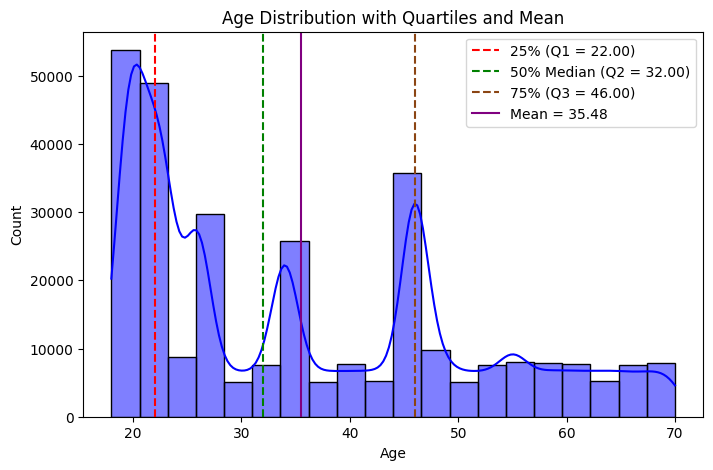

In [ ]:
q25 = retail['Age'].quantile(0.25)
q50 = retail['Age'].quantile(0.50)
q75 = retail['Age'].quantile(0.75)
mean_val = retail['Age'].mean()

plt.figure(figsize=(8,5))
sns.histplot(retail['Age'], bins=20, kde=True, color="blue")

# Quartiles
plt.axvline(q25, color='red', linestyle='--', label=f'25% (Q1 = {q25:.2f})')
plt.axvline(q50, color='green', linestyle='--', label=f'50% Median (Q2 = {q50:.2f})')
plt.axvline(q75, color='saddlebrown', linestyle='--', label=f'75% (Q3 = {q75:.2f})')

# Mean
plt.axvline(mean_val, color='purple', linestyle='-', label=f'Mean = {mean_val:.2f}')

plt.legend()
plt.title("Age Distribution with Quartiles and Mean")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


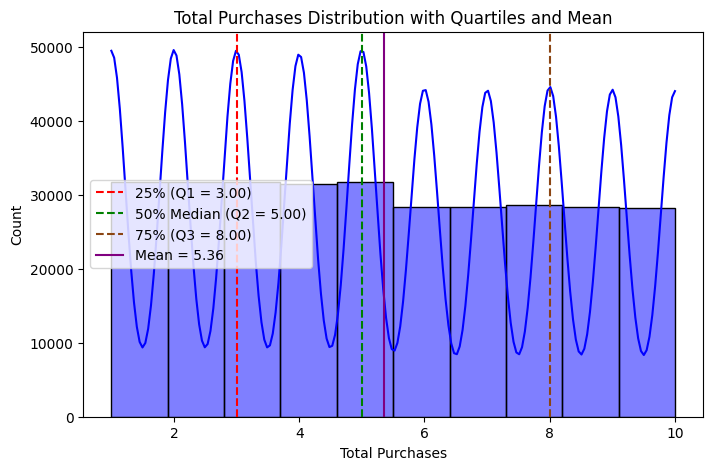

In [ ]:
q25 = retail['Total_Purchases'].quantile(0.25)
q50 = retail['Total_Purchases'].quantile(0.50)
q75 = retail['Total_Purchases'].quantile(0.75)
mean_val = retail['Total_Purchases'].mean()

plt.figure(figsize=(8,5))
sns.histplot(retail['Total_Purchases'], bins = 10, kde=True, color="blue")

# Quartiles
plt.axvline(q25, color='red', linestyle='--', label=f'25% (Q1 = {q25:.2f})')
plt.axvline(q50, color='green', linestyle='--', label=f'50% Median (Q2 = {q50:.2f})')
plt.axvline(q75, color='saddlebrown', linestyle='--', label=f'75% (Q3 = {q75:.2f})')

# Mean
plt.axvline(mean_val, color='purple', linestyle='-', label=f'Mean = {mean_val:.2f}')

plt.legend()
plt.title("Total Purchases Distribution with Quartiles and Mean")
plt.xlabel("Total Purchases")
plt.ylabel("Count")
plt.show()

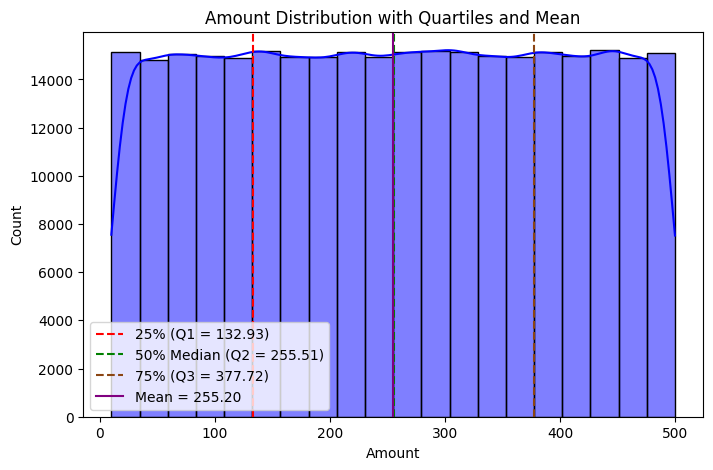

In [ ]:
q25 = retail['Amount'].quantile(0.25)
q50 = retail['Amount'].quantile(0.50)
q75 = retail['Amount'].quantile(0.75)
mean_val = retail['Amount'].mean()

plt.figure(figsize=(8,5))
sns.histplot(retail['Amount'], bins=20, kde=True, color="blue")

# Quartiles
plt.axvline(q25, color='red', linestyle='--', label=f'25% (Q1 = {q25:.2f})')
plt.axvline(q50, color='green', linestyle='--', label=f'50% Median (Q2 = {q50:.2f})')
plt.axvline(q75, color='saddlebrown', linestyle='--', label=f'75% (Q3 = {q75:.2f})')

# Mean
plt.axvline(mean_val, color='purple', linestyle='-', label=f'Mean = {mean_val:.2f}')

plt.legend()
plt.title("Amount Distribution with Quartiles and Mean")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

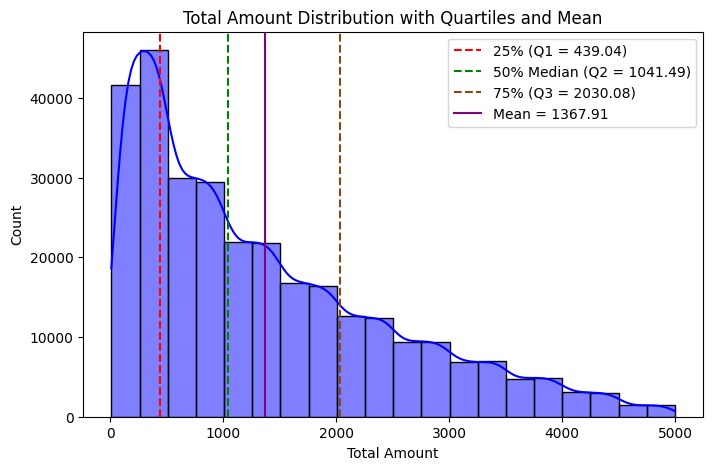

In [ ]:
q25 = retail['Total_Amount'].quantile(0.25)
q50 = retail['Total_Amount'].quantile(0.50)
q75 = retail['Total_Amount'].quantile(0.75)
mean_val = retail['Total_Amount'].mean()

plt.figure(figsize=(8,5))
sns.histplot(retail['Total_Amount'], bins=20, kde=True, color="blue")

# Quartiles
plt.axvline(q25, color='red', linestyle='--', label=f'25% (Q1 = {q25:.2f})')
plt.axvline(q50, color='green', linestyle='--', label=f'50% Median (Q2 = {q50:.2f})')
plt.axvline(q75, color='saddlebrown', linestyle='--', label=f'75% (Q3 = {q75:.2f})')

# Mean
plt.axvline(mean_val, color='purple', linestyle='-', label=f'Mean = {mean_val:.2f}')

plt.legend()
plt.title("Total Amount Distribution with Quartiles and Mean")
plt.xlabel("Total Amount")
plt.ylabel("Count")
plt.show()

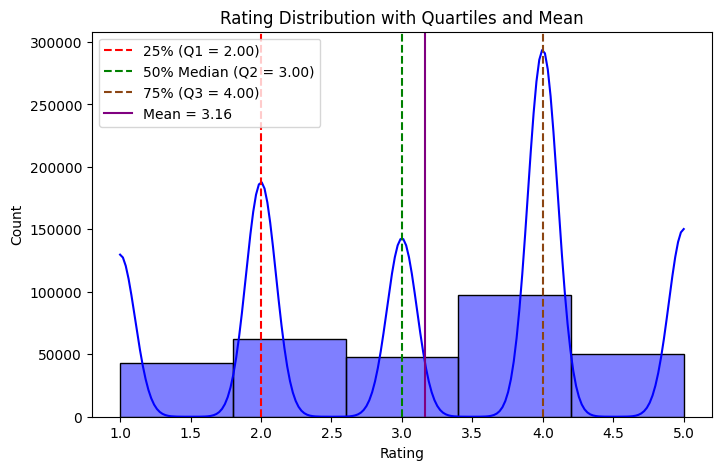

In [ ]:
q25 = retail['Ratings'].quantile(0.25)
q50 = retail['Ratings'].quantile(0.50)
q75 = retail['Ratings'].quantile(0.75)
mean_val = retail['Ratings'].mean()

plt.figure(figsize=(8,5))
sns.histplot(retail['Ratings'], bins=5, kde=True, color="blue")

# Quartiles
plt.axvline(q25, color='red', linestyle='--', label=f'25% (Q1 = {q25:.2f})')
plt.axvline(q50, color='green', linestyle='--', label=f'50% Median (Q2 = {q50:.2f})')
plt.axvline(q75, color='saddlebrown', linestyle='--', label=f'75% (Q3 = {q75:.2f})')

# Mean
plt.axvline(mean_val, color='purple', linestyle='-', label=f'Mean = {mean_val:.2f}')

plt.legend()
plt.title("Rating Distribution with Quartiles and Mean")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

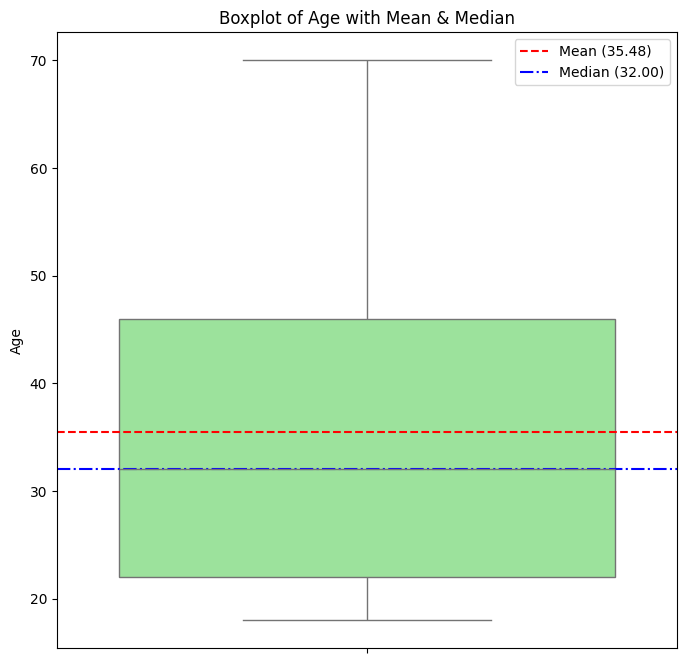

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y=retail['Age'], color="lightgreen")

# Calculate mean & median
mean_val = retail['Age'].mean()
median_val = retail['Age'].median()

# Add horizontal lines (because it's vertical plot → values go on y-axis)
plt.axhline(mean_val, color="red", linestyle="--", label=f"Mean ({mean_val:.2f})")
plt.axhline(median_val, color="blue", linestyle="-.", label=f"Median ({median_val:.2f})")

plt.title("Boxplot of Age with Mean & Median")
plt.ylabel("Age")
plt.legend()
plt.show()

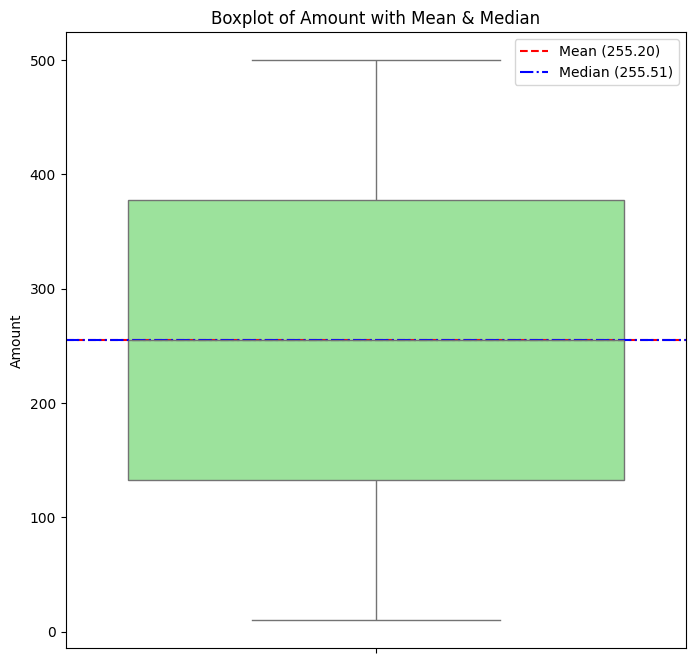

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y=retail['Amount'], color="lightgreen")

# Calculate mean & median
mean_val = retail['Amount'].mean()
median_val = retail['Amount'].median()

# Add horizontal lines (because it's vertical plot → values go on y-axis)
plt.axhline(mean_val, color="red", linestyle="--", label=f"Mean ({mean_val:.2f})")
plt.axhline(median_val, color="blue", linestyle="-.", label=f"Median ({median_val:.2f})")

plt.title("Boxplot of Amount with Mean & Median")
plt.ylabel("Amount")
plt.legend()
plt.show()

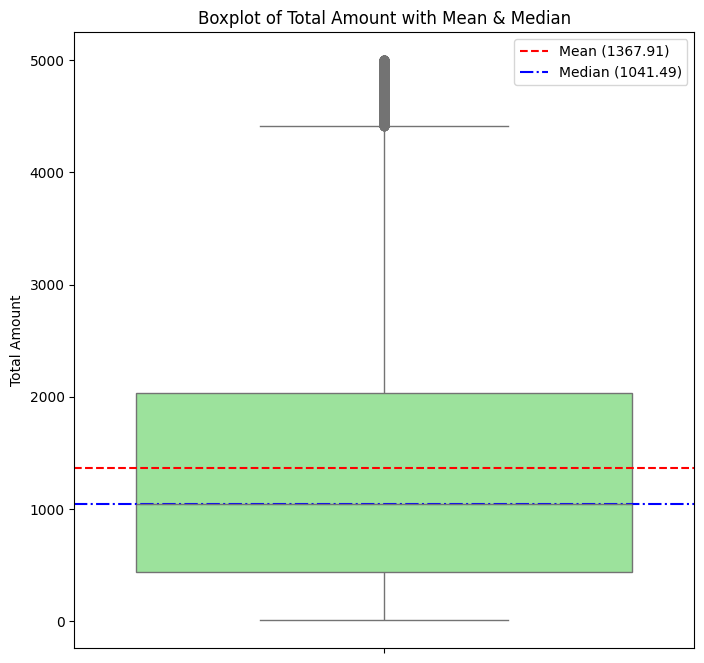

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y=retail['Total_Amount'], color="lightgreen")

# Calculate mean & median
mean_val = retail['Total_Amount'].mean()
median_val = retail['Total_Amount'].median()

# Add horizontal lines (because it's vertical plot → values go on y-axis)
plt.axhline(mean_val, color="red", linestyle="--", label=f"Mean ({mean_val:.2f})")
plt.axhline(median_val, color="blue", linestyle="-.", label=f"Median ({median_val:.2f})")

plt.title("Boxplot of Total Amount with Mean & Median")
plt.ylabel("Total Amount")
plt.legend()
plt.show()

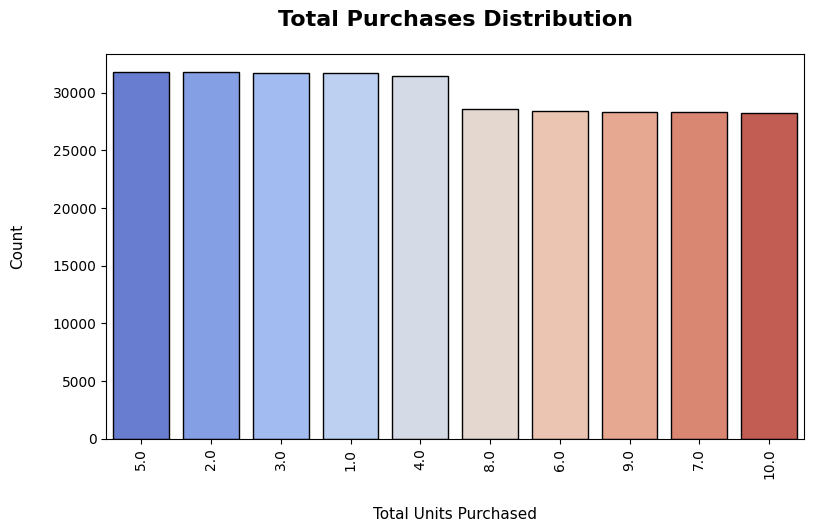

In [ ]:
# Visualizing the Total Purchase distributions

plt.figure(figsize = (9,5))
sns.barplot(retail['Total_Purchases'].value_counts() , palette = 'coolwarm' , edgecolor = 'black' , order = retail['Total_Purchases'].value_counts().index)

plt.title('Total Purchases Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Units Purchased', fontsize=11, fontweight='book', labelpad=20)
plt.ylabel('Count', fontsize=11, fontweight='book', labelpad=20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

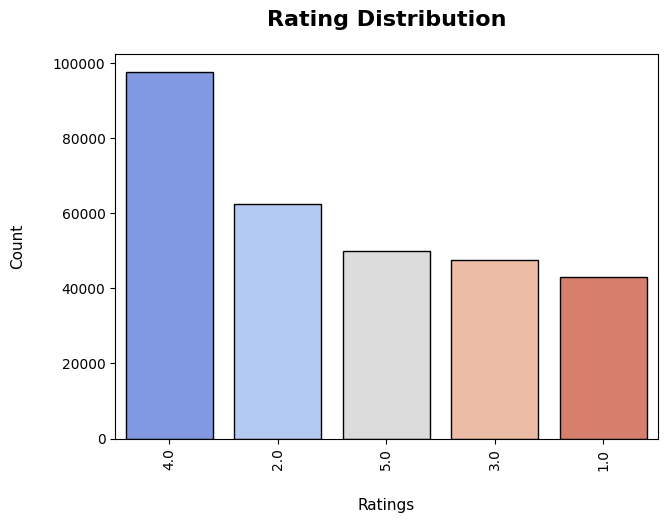

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(retail['Ratings'].value_counts() , palette = 'coolwarm' , edgecolor = 'black' , order = retail['Ratings'].value_counts().index)

plt.title('Rating Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ratings', fontsize=11, fontweight='book', labelpad=20)
plt.ylabel('Count', fontsize=11, fontweight='book', labelpad=20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

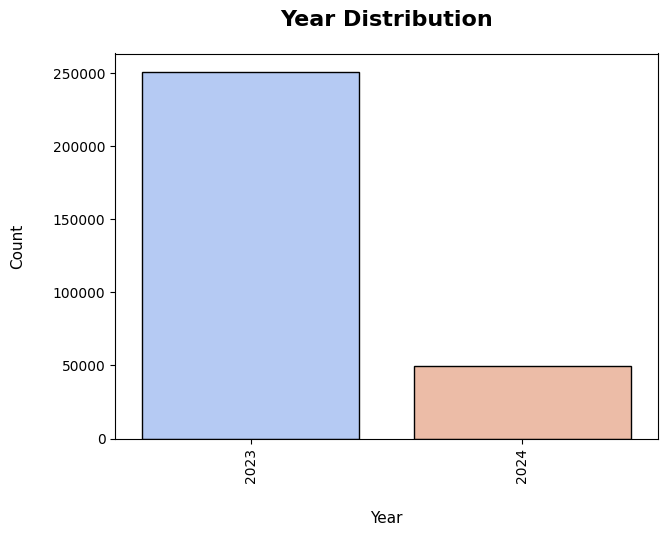

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(retail['Year'].value_counts() , palette = 'coolwarm' , edgecolor = 'black' , order = retail['Year'].value_counts().index)

plt.title('Year Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=11, fontweight='book', labelpad=20)
plt.ylabel('Count', fontsize=11, fontweight='book', labelpad=20)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

In [ ]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ["18–25", "26–35", "36–45", "46–55", "56–65", "66–75"]
retail['Age_Group'] = pd.cut(retail['Age'], bins=bins, labels=labels, right=True)

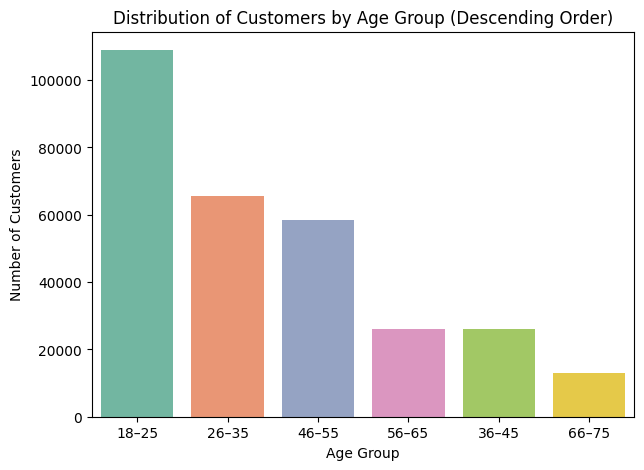

In [ ]:
plt.figure(figsize=(7,5))

# Count and sort Age_Group by frequency (descending)
age_order = retail['Age_Group'].value_counts().sort_values(ascending=False).index

sns.countplot(x='Age_Group', data=retail, order=age_order, palette="Set2")

plt.title("Distribution of Customers by Age Group (Descending Order)")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
# Categorical: Transaction_ID, Customer_ID, Name, Email, Phone, Address, City, State, Zipcode, Country, Gender, Income, Customer_Segment, Month, Product_Category, Product_Brand,
# Product_Type, Feedback, Shipping_Method, Payment_Method, Order_Status, products

In [ ]:
# Variables to be analyzed: City, State, Country, Gender, Income, Customer_Segment, Month, Product_Category, Product_Brand,
# Product_Type, Feedback, Shipping_Method, Payment_Method, Order_Status, products

In [ ]:
# Demographics first → defines who the customers are.

In [ ]:
retail['Gender'].value_counts()

Gender
Male      186747
Female    113588
Name: count, dtype: int64

In [ ]:
retail['Gender'].value_counts(normalize=True) * 100

Gender
Male      62.179566
Female    37.820434
Name: proportion, dtype: float64

In [ ]:
retail['Income'].value_counts()

Income
Medium    129670
Low        95807
High       74884
Name: count, dtype: int64

In [ ]:
retail['Income'].value_counts(normalize=True) * 100

Income
Medium    43.171384
Low       31.897284
High      24.931333
Name: proportion, dtype: float64

In [ ]:
retail['Customer_Segment'].value_counts()

Customer_Segment
Regular    145575
New         90766
Premium     64095
Name: count, dtype: int64

In [ ]:
retail['Customer_Segment'].value_counts(normalize=True) * 100

Customer_Segment
Regular    48.454579
New        30.211426
Premium    21.333995
Name: proportion, dtype: float64

In [ ]:
# Define the utility function

def plot_categorical_donut(dataframe, column_name, n_categories=7, figsize=(10, 10)):
    """
    Generates and displays a donut chart for the top N categories of a specified column.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the categorical column to plot.
    n_categories (int): The number of top categories to display explicitly.
                        Remaining categories will be grouped into 'Other'.
    figsize (tuple): A tuple (width, height) for the figure size.
    """
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Calculate value counts
    counts = dataframe[column_name].value_counts()

    # Prepare data for plotting: select top N and sum the rest into 'Other'
    if len(counts) > n_categories:
        top_n = counts.head(n_categories)
        other_sum = counts.iloc[n_categories:].sum()
        if other_sum > 0:
            plot_data = pd.concat([top_n, pd.Series({'Other': other_sum})])
        else:
            plot_data = top_n
    else:
        plot_data = counts

    # Define colors
    colors = sns.color_palette('Set1', n_colors=len(plot_data))
    if 'Other' in plot_data.index:
        colors = sns.color_palette('Set1', n_colors=len(plot_data) - 1) + ['gray'] # Distinct color for 'Other'

    # Create figure and axis for the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plotting the donut chart
    wedges, texts, autotexts = ax.pie(
        plot_data,
        labels=plot_data.index,
        autopct='%1.1f%%',       # Format percentages
        startangle=90,           # Start at the top
        colors=colors,
        pctdistance=0.8,         # Position of percentage labels (closer to center of donut hole)
        labeldistance=1.05,      # Position of category labels (outside the donut)
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1) # Donut hole via width
    )

    # Customize percentage labels
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

    # Customize category labels
    for text in texts:
        text.set_fontsize(12)

    # Set title
    ax.set_title(f'Proportional Distribution of Top {n_categories} {column_name}', fontsize=16, fontweight='bold')
    ax.axis('equal') # Ensure circle

    plt.tight_layout()
    plt.show()


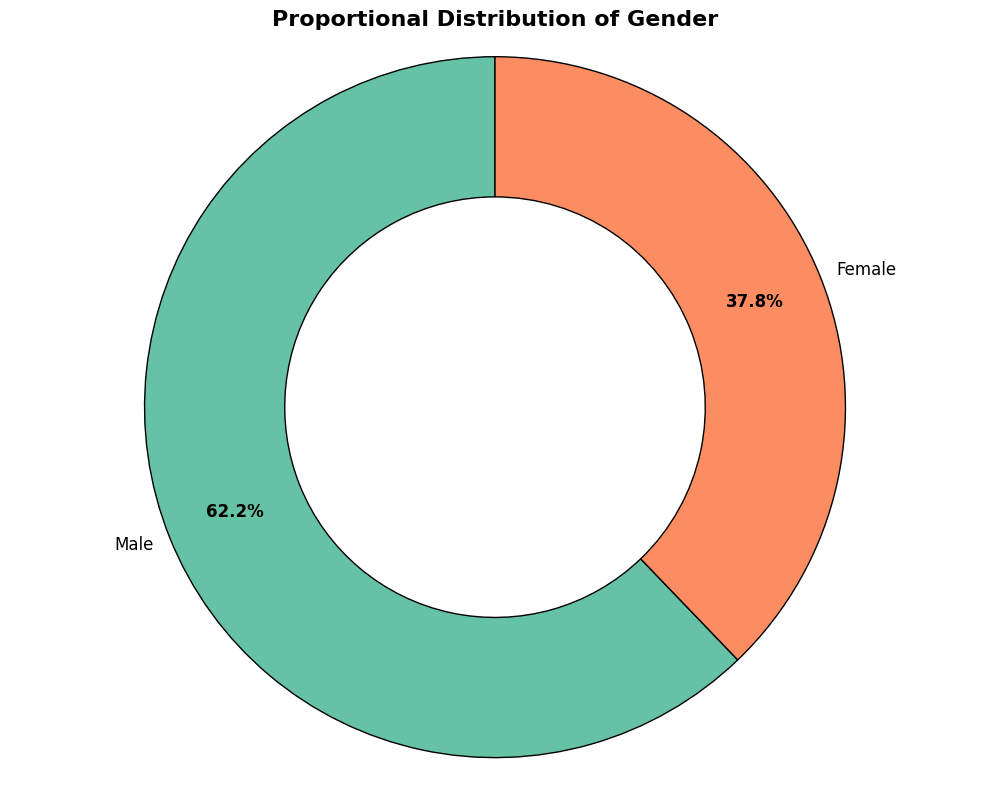

In [ ]:
plot_categorical_donut(retail, 'Gender', n_categories=2 , figsize=(10,8))

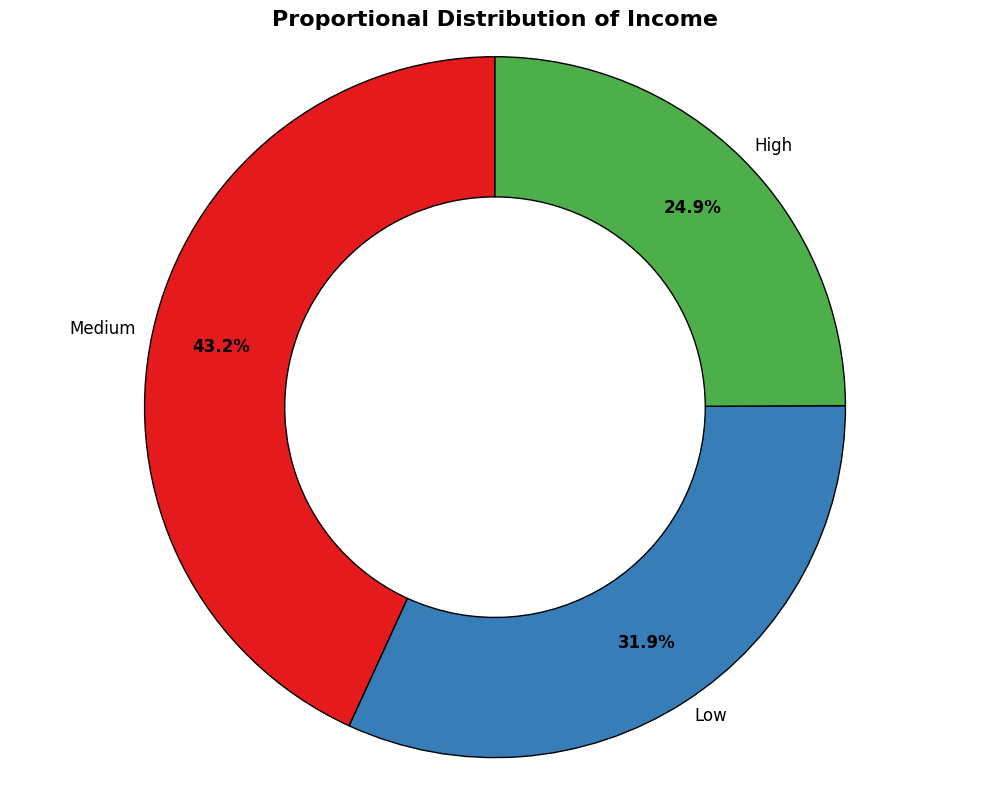

In [ ]:
plot_categorical_donut(retail, 'Income', n_categories=3 , figsize=(10,8))

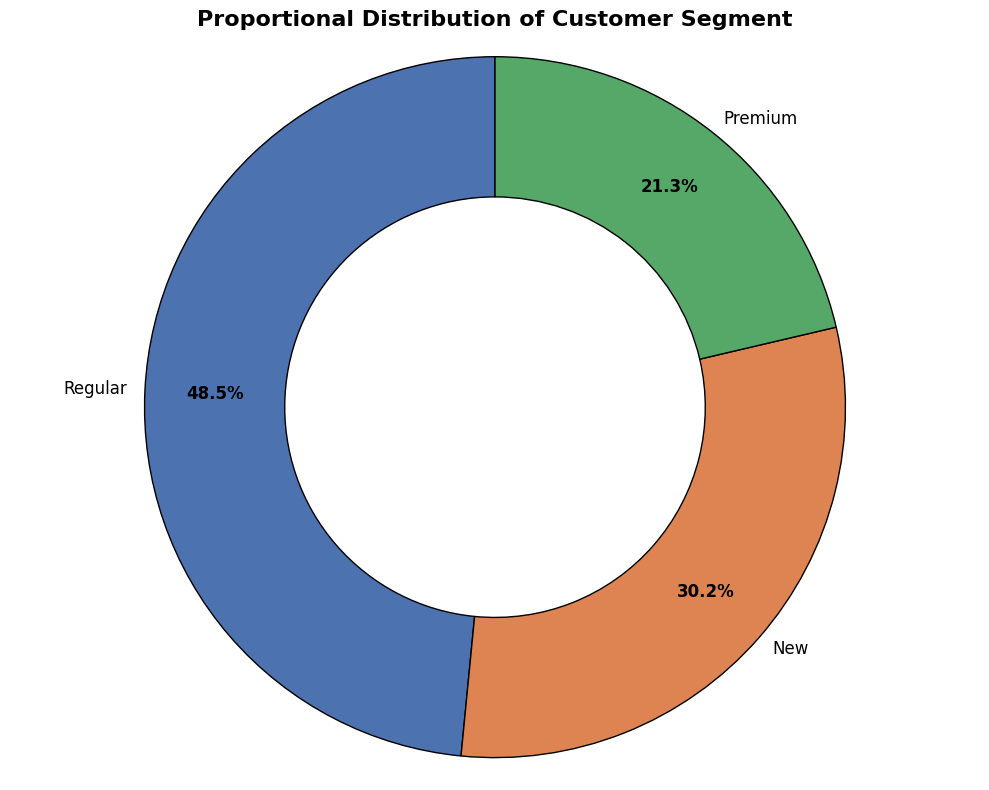

In [ ]:
plot_categorical_donut(retail, 'Customer_Segment', n_categories=3 , figsize=(10,8))

In [ ]:
# Geography next → shows where they come from.

In [ ]:
retail['City'].value_counts()

City
Chicago          0.071720
Portsmouth       0.066737
San Francisco    0.040389
Frankfurt        0.033765
Boston           0.031195
                   ...   
Washington       0.002859
Arlington        0.002836
Denver           0.002836
Philadelphia     0.002780
San Diego        0.002763
Name: proportion, Length: 130, dtype: float64

In [ ]:
retail['City'].value_counts(normalize=True) * 100

City
Chicago          7.172032
Portsmouth       6.673702
San Francisco    4.038908
Frankfurt        3.376464
Boston           3.119476
                   ...   
Washington       0.285949
Arlington        0.283619
Denver           0.283619
Philadelphia     0.277960
San Diego        0.276296
Name: proportion, Length: 130, dtype: float64

In [ ]:
retail['State'].value_counts()

State
England            62795
Berlin             52598
New South Wales    45124
Ontario            45098
Connecticut        21549
Maine              12135
Georgia             9460
Kansas              5486
New Mexico          5168
New York             995
Maryland             975
Pennsylvania         956
Texas                950
Nevada               945
California           945
Iowa                 942
West Virginia        939
Ohio                 938
South Carolina       938
Minnesota            938
Illinois             938
Mississippi          932
Hawaii               931
Louisiana            925
Utah                 921
Michigan             917
New Jersey           916
Virginia             912
Alabama              907
Montana              905
Wyoming              902
Delaware             902
South Dakota         901
Wisconsin            900
Oregon               898
Florida              898
North Carolina       897
Kentucky             896
Missouri             895
Arkansas             895
Nebraska             895
Rhode Island         895
Indiana              894
Tennessee            894
New Hampshire        892
Alaska               882
Vermont              881
Colorado             878
North Dakota         876
Idaho                876
Washington           873
Massachusetts        868
Arizona              861
Oklahoma             848
Name: count, dtype: int64

In [ ]:
retail['State'].value_counts(normalize=True) * 100

State
England            20.905535
Berlin             17.510778
New South Wales    15.022555
Ontario            15.013899
Connecticut         7.174032
Maine               4.039950
Georgia             3.149397
Kansas              1.826384
New Mexico          1.720516
New York            0.331253
Maryland            0.324594
Pennsylvania        0.318269
Texas               0.316271
Nevada              0.314607
California          0.314607
Iowa                0.313608
West Virginia       0.312609
Ohio                0.312276
South Carolina      0.312276
Minnesota           0.312276
Illinois            0.312276
Mississippi         0.310279
Hawaii              0.309946
Louisiana           0.307948
Utah                0.306617
Michigan            0.305285
New Jersey          0.304952
Virginia            0.303620
Alabama             0.301956
Montana             0.301290
Wyoming             0.300291
Delaware            0.300291
South Dakota        0.299958
Wisconsin           0.299625
Oregon              0.298960
Florida             0.298960
North Carolina      0.298627
Kentucky            0.298294
Missouri            0.297961
Arkansas            0.297961
Nebraska            0.297961
Rhode Island        0.297961
Indiana             0.297628
Tennessee           0.297628
New Hampshire       0.296962
Alaska              0.293633
Vermont             0.293300
Colorado            0.292301
North Dakota        0.291635
Idaho               0.291635
Washington          0.290637
Massachusetts       0.288972
Arizona             0.286642
Oklahoma            0.282314
Name: proportion, dtype: float64

In [ ]:
retail['Country'].value_counts()

Country
USA          94765
UK           62801
Germany      52603
Australia    45127
Canada       45086
Name: count, dtype: int64

In [ ]:
retail['Country'].value_counts(normalize=True) * 100

Country
USA          31.548162
UK           20.907045
Germany      17.512035
Australia    15.023204
Canada       15.009555
Name: proportion, dtype: float64

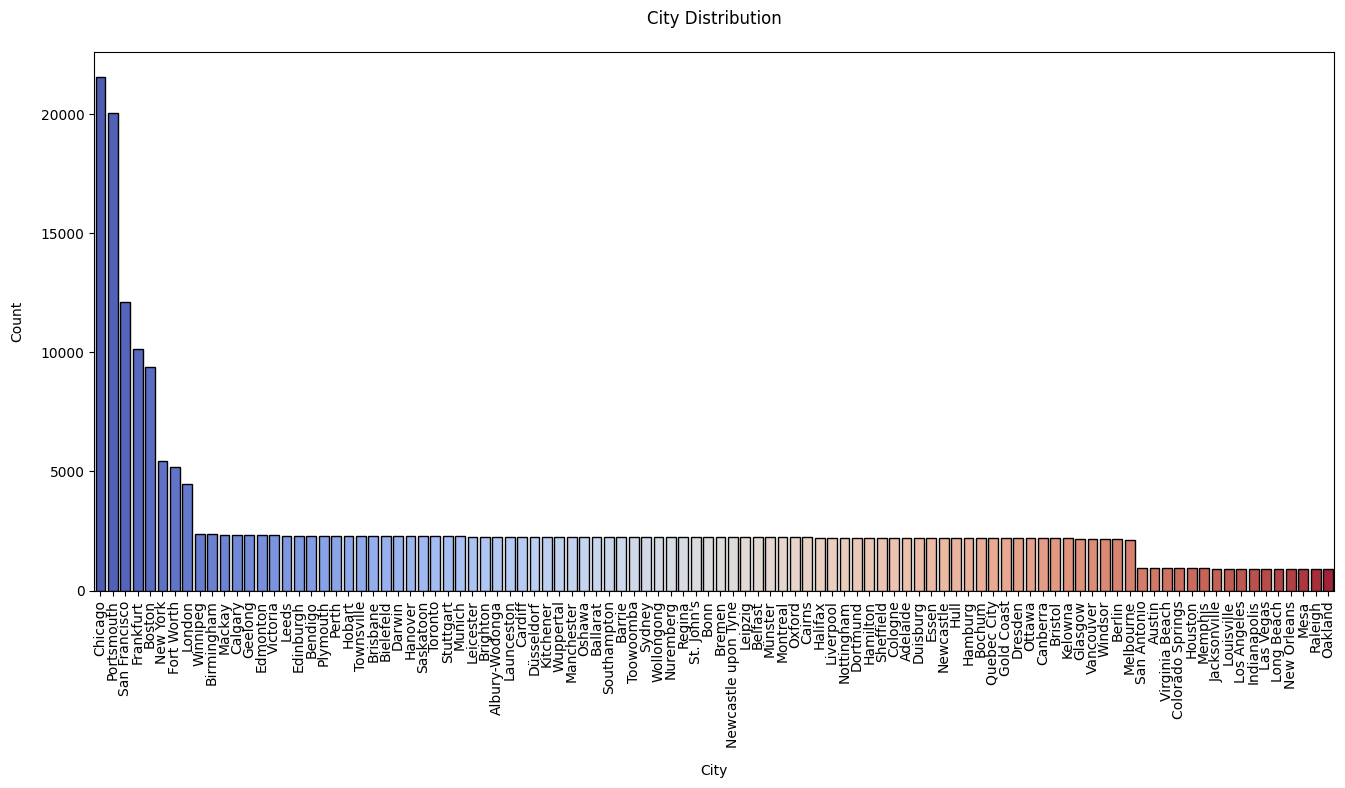

In [ ]:
plt.figure(figsize = (16,7))
sns.barplot(retail['City'].value_counts().head(100) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('City Distribution', pad = 20)
plt.xlabel('City', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

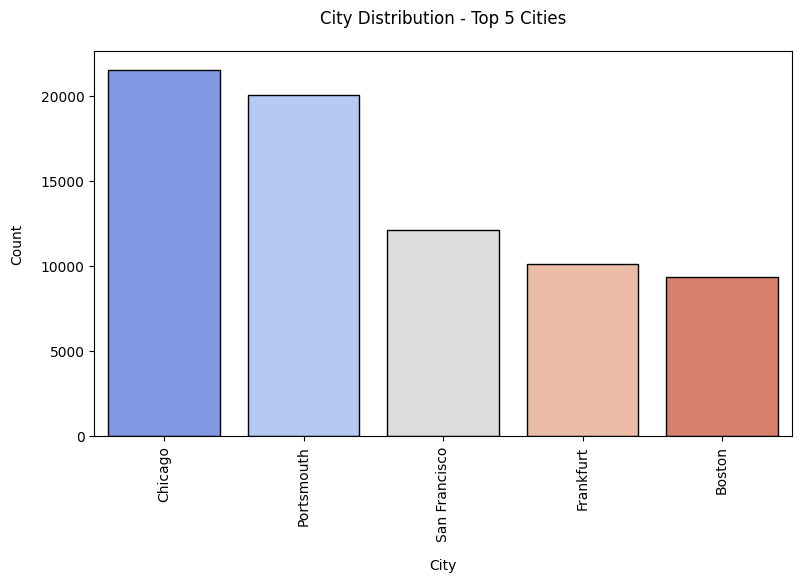

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['City'].value_counts().head(5) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('City Distribution - Top 5 Cities', pad= 20)
plt.xlabel('City', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

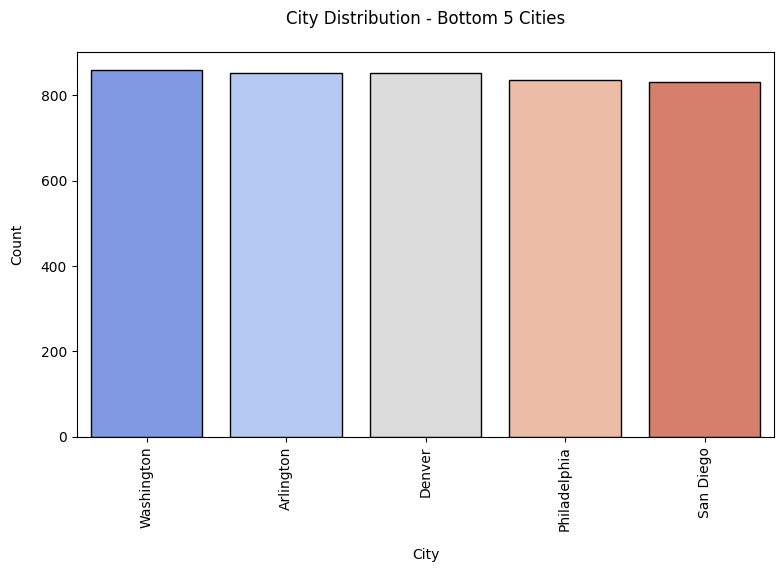

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['City'].value_counts().tail(5) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('City Distribution - Bottom 5 Cities', pad = 20)
plt.xlabel('City', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

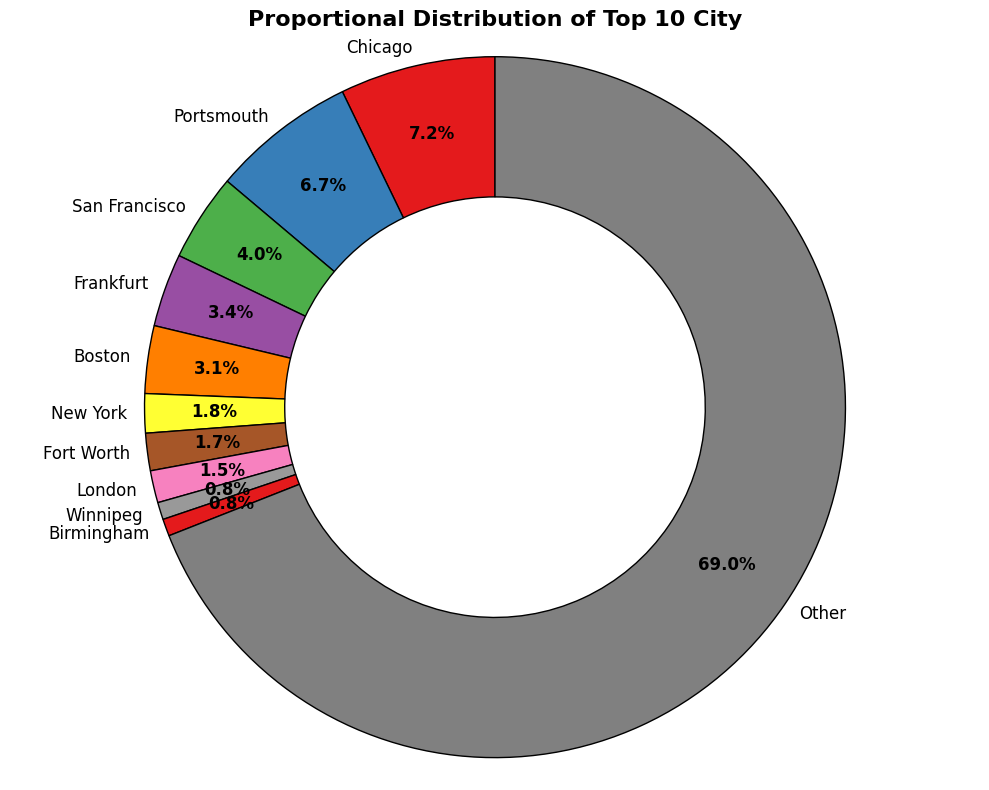

In [ ]:
plot_categorical_donut(retail, 'City', n_categories=10 , figsize=(10,8))

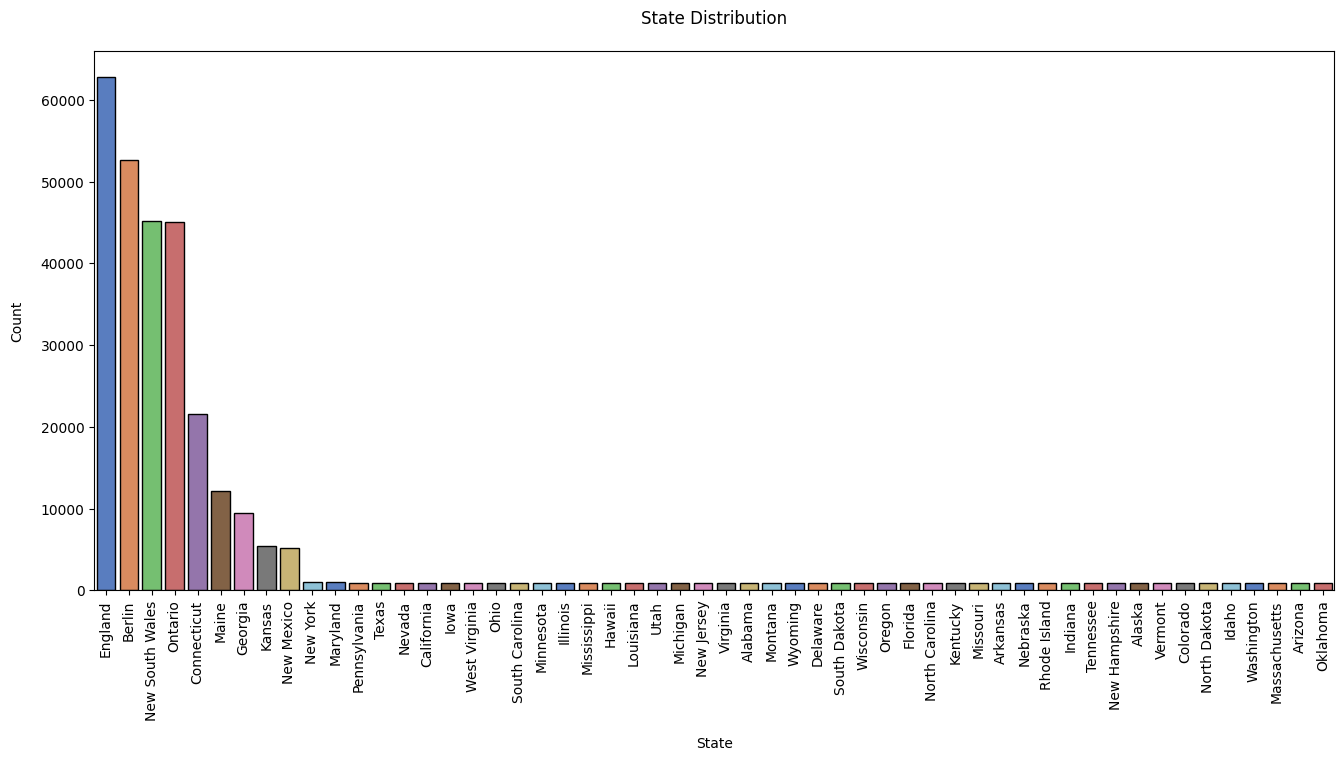

In [ ]:
plt.figure(figsize = (16,7))
sns.barplot(retail['State'].value_counts() , palette = 'muted' , edgecolor = 'black')

plt.title('State Distribution', pad = 20)
plt.xlabel('State', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

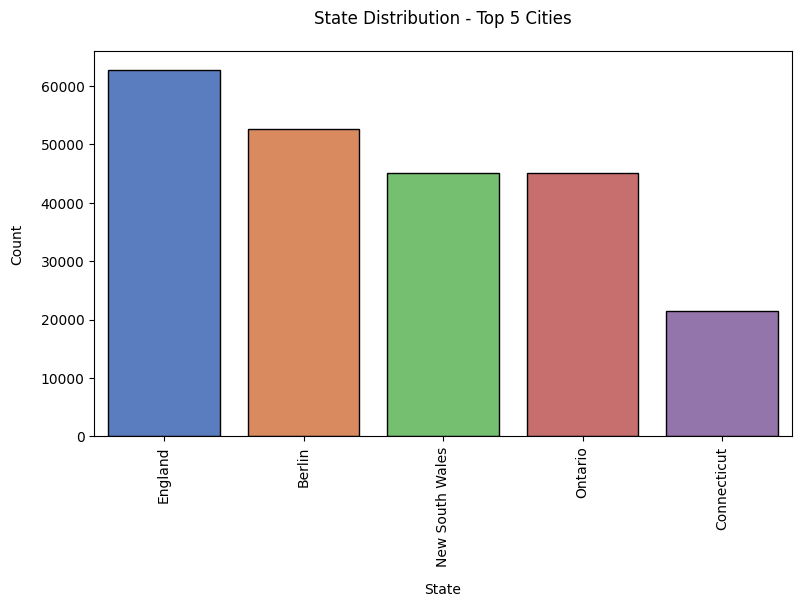

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['State'].value_counts().head(5) , palette = 'muted' , edgecolor = 'black')

plt.title('State Distribution - Top 5 Cities', pad= 20)
plt.xlabel('State', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

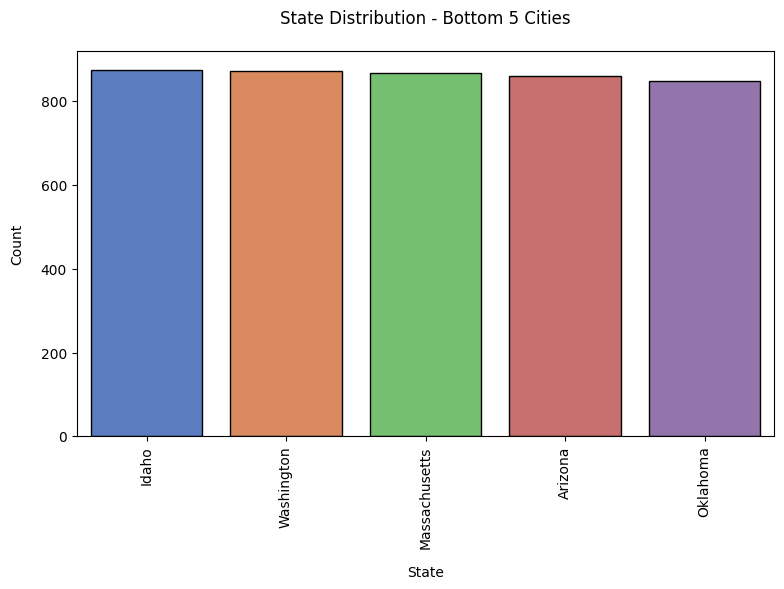

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['State'].value_counts().tail(5) , palette = 'muted' , edgecolor = 'black')

plt.title('State Distribution - Bottom 5 Cities', pad= 20)
plt.xlabel('State', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

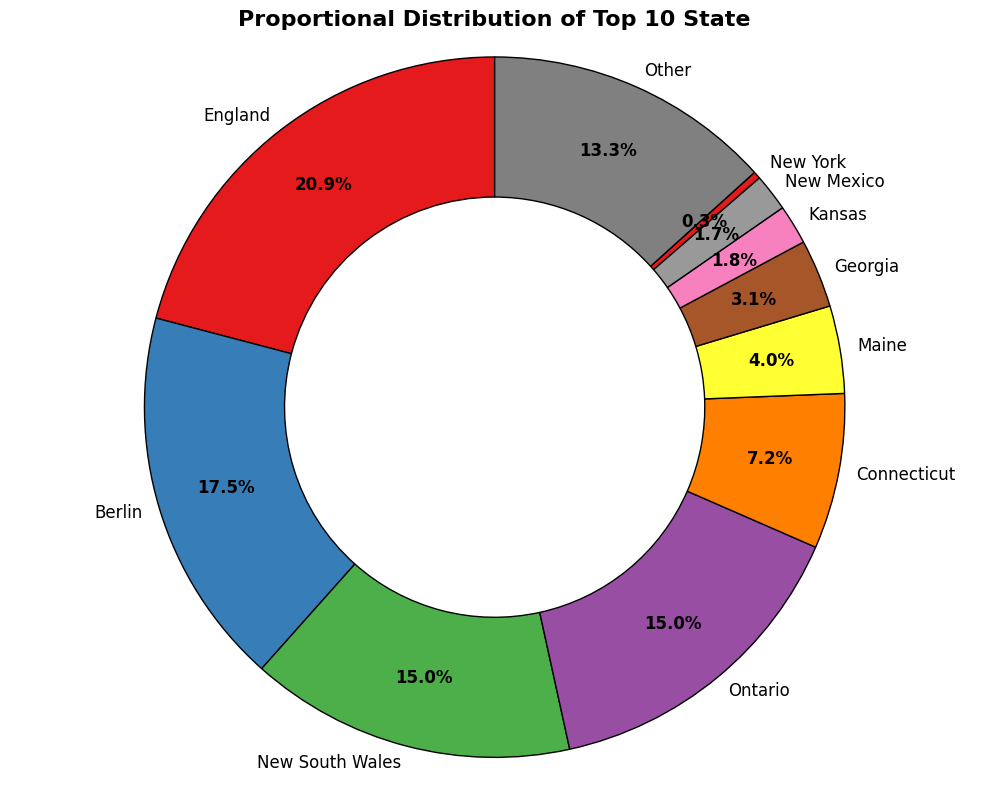

In [ ]:
plot_categorical_donut(retail, 'State', n_categories=10 , figsize=(10,8))

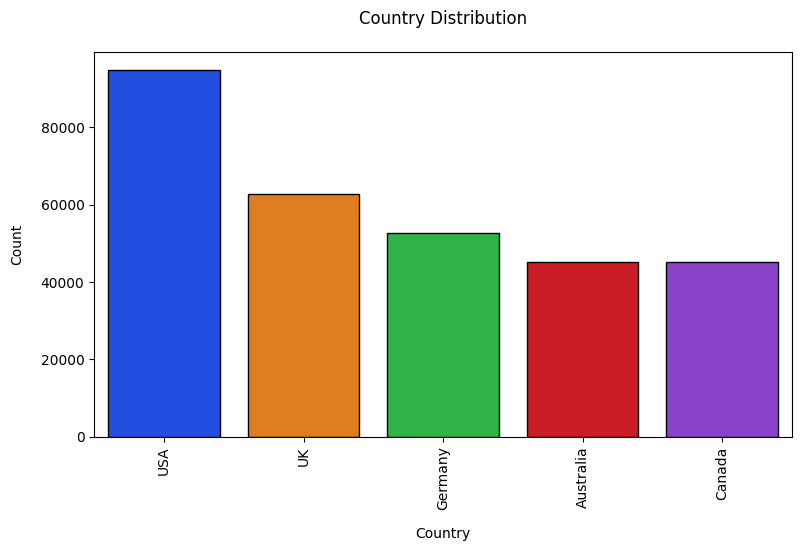

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Country'].value_counts() , palette = 'bright' , edgecolor = 'black')

plt.title('Country Distribution', pad= 20)
plt.xlabel('Country', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

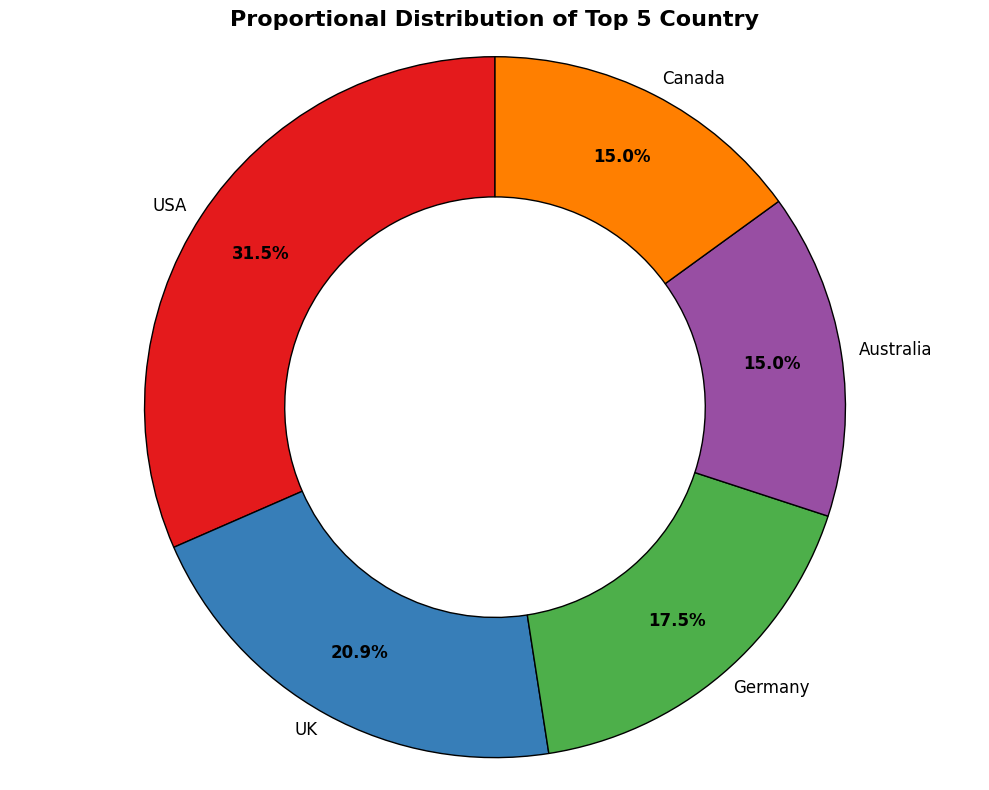

In [ ]:
plot_categorical_donut(retail, 'Country', n_categories=5 , figsize=(10,8))

In [ ]:
# Products in the middle → shows what they buy.

In [ ]:
retail['Product_Category'].value_counts()

Product_Category
Electronics    70855
Grocery        66483
Clothing       54500
Books          54399
Home Decor     54132
Name: count, dtype: int64

In [ ]:
retail['Product_Category'].value_counts(normalize=True) * 100

Product_Category
Electronics    23.589318
Grocery        22.133775
Clothing       18.144349
Books          18.110724
Home Decor     18.021833
Name: proportion, dtype: float64

In [ ]:
retail['Product_Brand'].value_counts()

Product_Brand
Pepsi                30140
Coca-Cola            18319
Zara                 18284
Samsung              18283
HarperCollins        18279
Sony                 18244
Adidas               18163
Bed Bath & Beyond    18145
Home Depot           18077
Nike                 18059
Penguin Books        18058
Random House         18052
Nestle               18032
Apple                17980
IKEA                 17912
Whirepool             7415
Mitsubhisi            6690
BlueStar              2241
Name: count, dtype: int64

In [ ]:
retail['Product_Brand'].value_counts(normalize=True) * 100

Product_Brand
Pepsi                10.034191
Coca-Cola             6.098751
Zara                  6.087098
Samsung               6.086765
HarperCollins         6.085434
Sony                  6.073782
Adidas                6.046815
Bed Bath & Beyond     6.040823
Home Depot            6.018184
Nike                  6.012192
Penguin Books         6.011859
Random House          6.009861
Nestle                6.003203
Apple                 5.985891
IKEA                  5.963252
Whirepool             2.468597
Mitsubhisi            2.227231
BlueStar              0.746072
Name: proportion, dtype: float64

In [ ]:
retail['Product_Type'].value_counts()

Product_Type
Water                                 24340
Smartphone                            18381
Non-Fiction                           18101
Fiction                               17966
Juice                                 12173
Television                            12138
T-shirt                               12129
Decorations                           12123
Shoes                                 12087
Tablet                                12023
Soft Drink                            11986
Furniture                             11923
Fridge                                 7415
Mitsubishi 1.5 Ton 3 Star Split AC     6690
Thriller                               6244
Kitchen                                6191
Coffee                                 6145
Children's                             6118
Jeans                                  6106
Shirt                                  6099
Dress                                  6098
Headphones                             6061
Shorts                                 6059
Lighting                               6045
Chocolate                              6039
Literature                             6024
Bathroom                               5988
Bedding                                5986
Jacket                                 5982
Laptop                                 5952
Tools                                  5929
Snacks                                 5869
BlueStar AC                            2241
Name: count, dtype: int64

In [ ]:
retail['Product_Type'].value_counts(normalize=True) * 100

Product_Type
Water                                 8.095766
Smartphone                            6.113733
Non-Fiction                           6.020602
Fiction                               5.975699
Juice                                 4.048881
Television                            4.037239
T-shirt                               4.034246
Decorations                           4.032250
Shoes                                 4.020276
Tablet                                3.998989
Soft Drink                            3.986682
Furniture                             3.965728
Fridge                                2.466315
Mitsubishi 1.5 Ton 3 Star Split AC    2.225171
Thriller                              2.076827
Kitchen                               2.059198
Coffee                                2.043898
Children's                            2.034918
Jeans                                 2.030926
Shirt                                 2.028598
Dress                                 2.028265
Headphones                            2.015959
Shorts                                2.015293
Lighting                              2.010637
Chocolate                             2.008641
Literature                            2.003652
Bathroom                              1.991678
Bedding                               1.991013
Jacket                                1.989682
Laptop                                1.979704
Tools                                 1.972054
Snacks                                1.952097
BlueStar AC                           0.745383
Name: proportion, dtype: float64

In [ ]:
retail['products'].value_counts()

products
Spring water       2491
Mystery            2487
Bottled water      2485
Distilled water    2464
Artesian water     2462
                   ... 
Screwdriver set     556
Towel rack          555
Razer Blade         553
Parka               547
Package AC          221
Name: count, Length: 318, dtype: int64

In [ ]:
retail['products'].value_counts(normalize=True) * 100

products
Spring water       0.828535
Mystery            0.827205
Bottled water      0.826540
Distilled water    0.819555
Artesian water     0.818890
                     ...   
Screwdriver set    0.184932
Towel rack         0.184599
Razer Blade        0.183934
Parka              0.181939
Package AC         0.073507
Name: proportion, Length: 318, dtype: float64

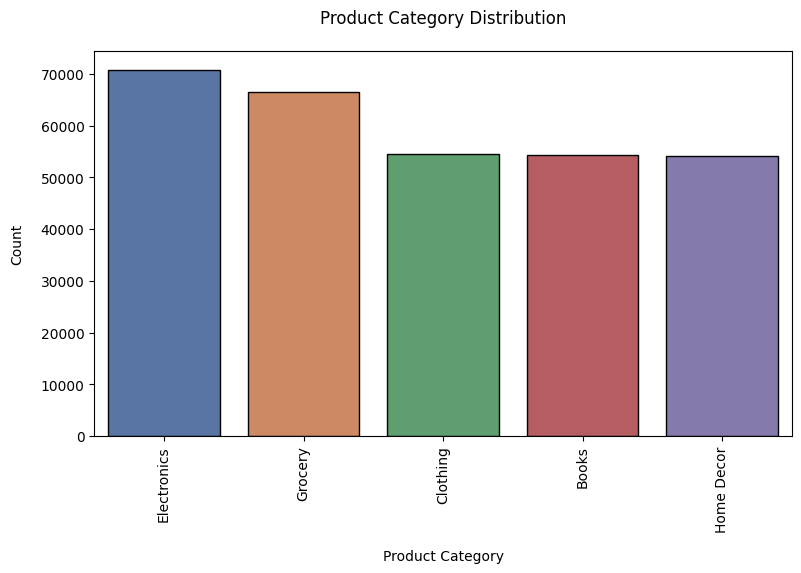

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Product_Category'].value_counts() , palette = 'deep' , edgecolor = 'black')

plt.title('Product Category Distribution', pad= 20)
plt.xlabel('Product Category', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

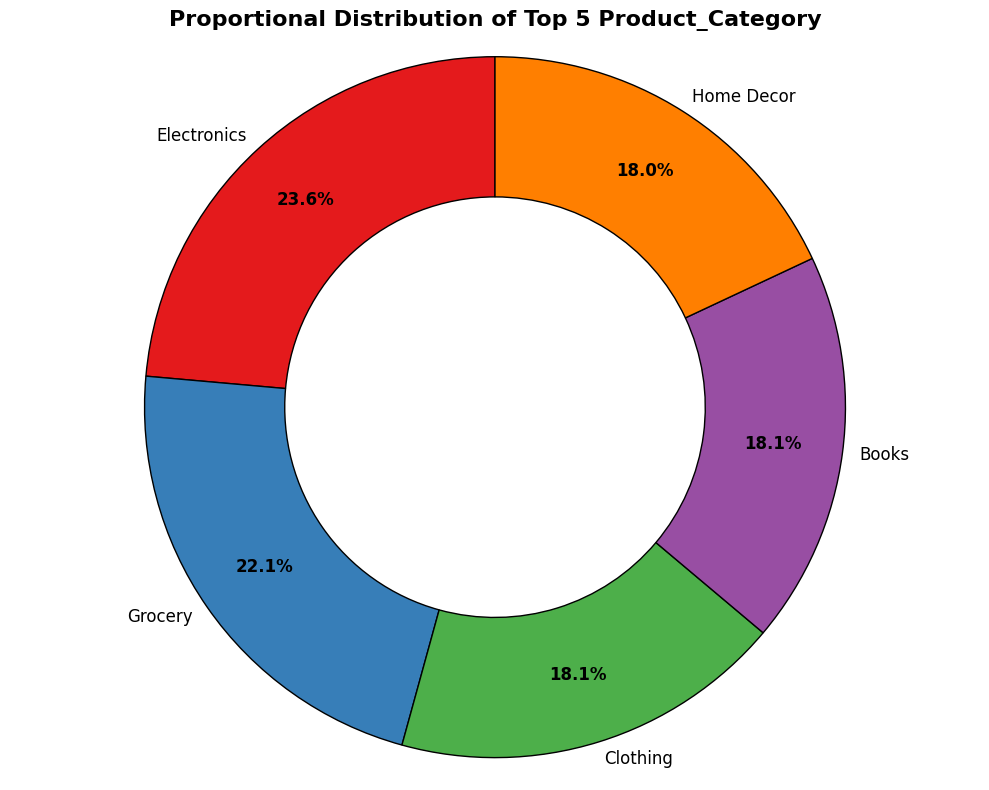

In [ ]:
plot_categorical_donut(retail, 'Product_Category', n_categories=5 , figsize=(10,8))

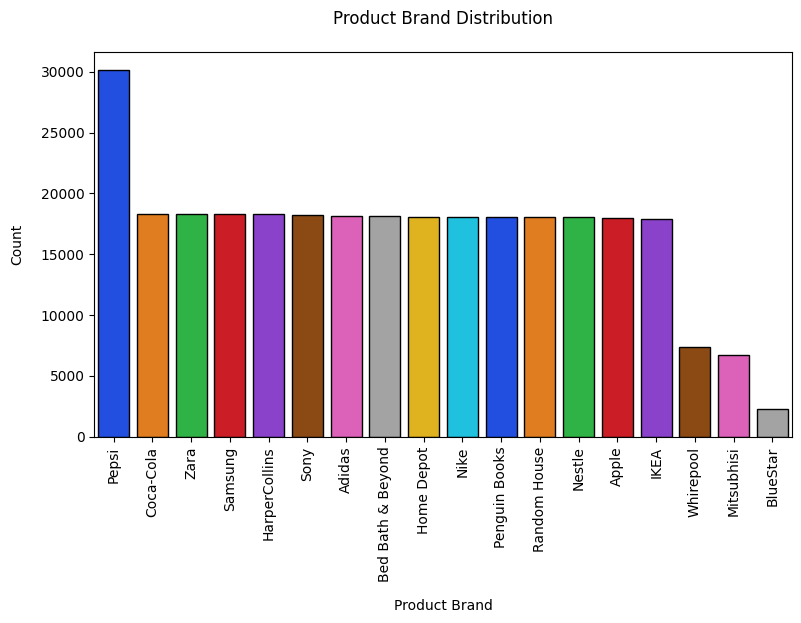

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Product_Brand'].value_counts() , palette = 'bright' , edgecolor = 'black')

plt.title('Product Brand Distribution', pad= 20)
plt.xlabel('Product Brand', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

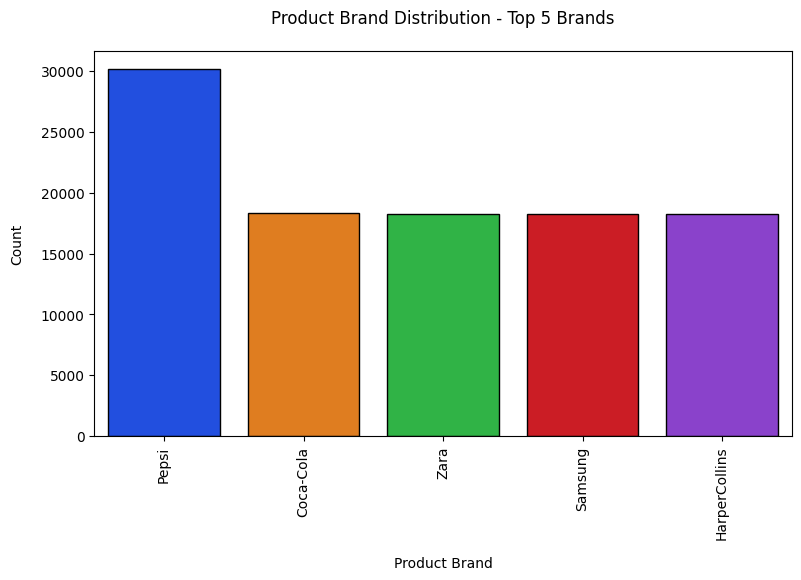

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Product_Brand'].value_counts().head(5) , palette = 'bright' , edgecolor = 'black')

plt.title('Product Brand Distribution - Top 5 Brands', pad= 20)
plt.xlabel('Product Brand', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

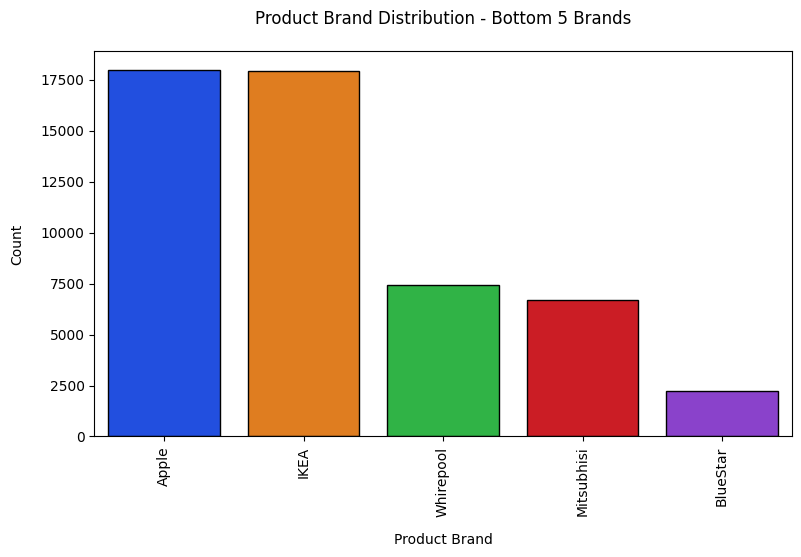

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Product_Brand'].value_counts().tail(5) , palette = 'bright' , edgecolor = 'black')

plt.title('Product Brand Distribution - Bottom 5 Brands', pad= 20)
plt.xlabel('Product Brand', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

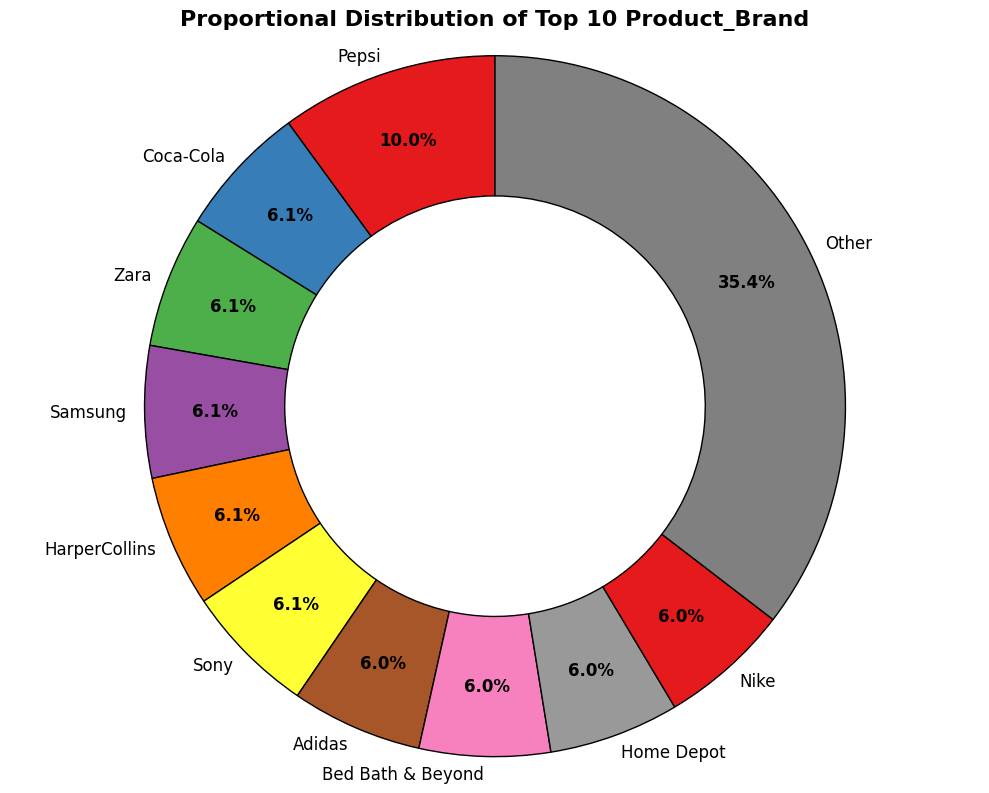

In [ ]:
plot_categorical_donut(retail, 'Product_Brand', n_categories=10 , figsize=(10,8))

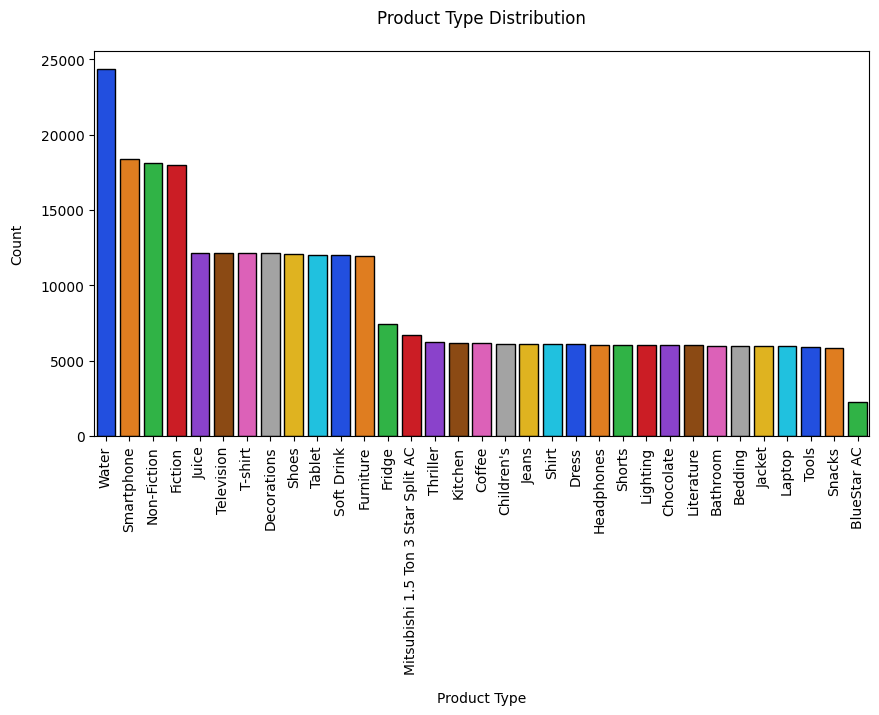

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(retail['Product_Type'].value_counts() , palette = 'bright' , edgecolor = 'black')

plt.title('Product Type Distribution', pad= 20)
plt.xlabel('Product Type', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

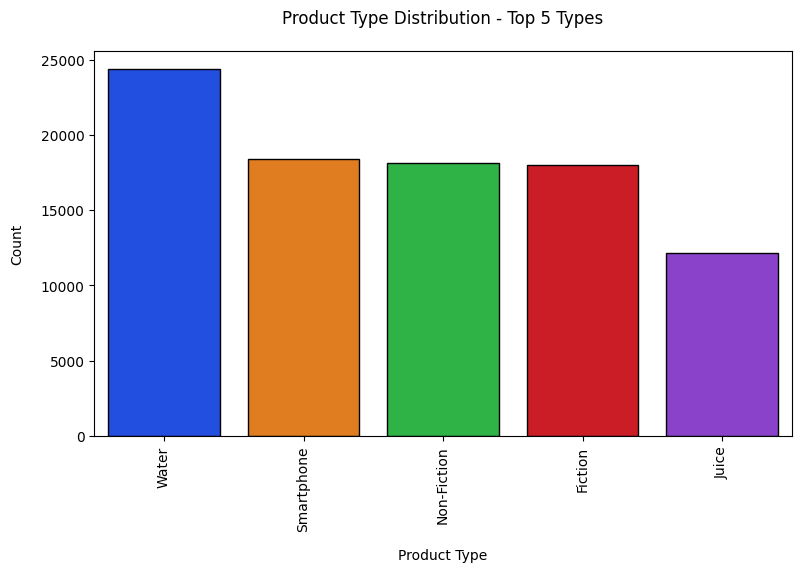

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Product_Type'].value_counts().head(5) , palette = 'bright' , edgecolor = 'black')

plt.title('Product Type Distribution - Top 5 Types', pad= 20)
plt.xlabel('Product Type', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

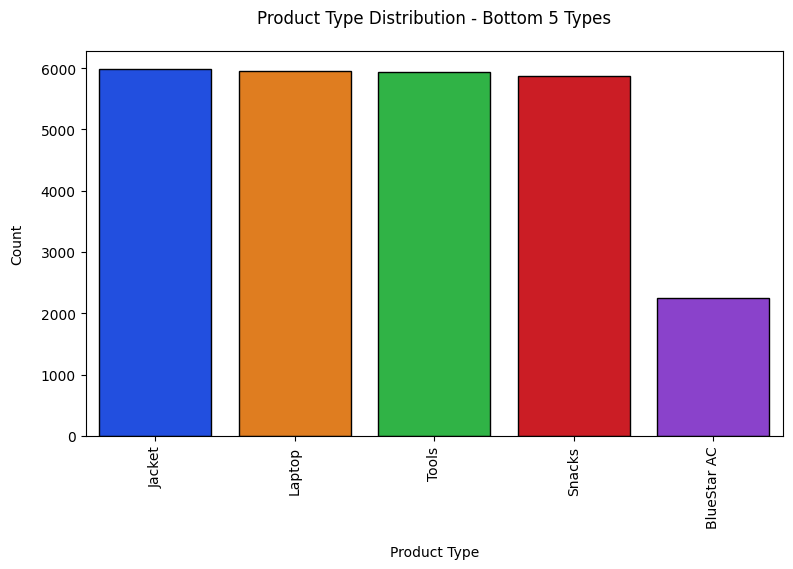

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Product_Type'].value_counts().tail(5) , palette = 'bright' , edgecolor = 'black')

plt.title('Product Type Distribution - Bottom 5 Types', pad= 20)
plt.xlabel('Product Type', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

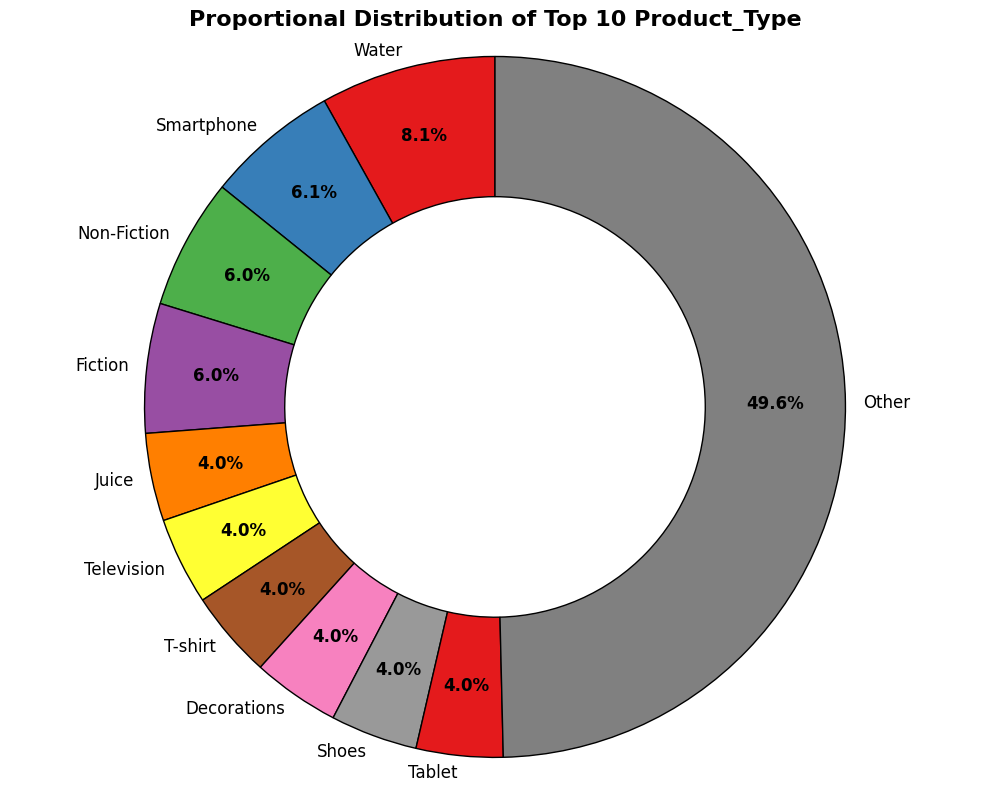

In [ ]:
plot_categorical_donut(retail, 'Product_Type', n_categories=10 , figsize=(10,8))

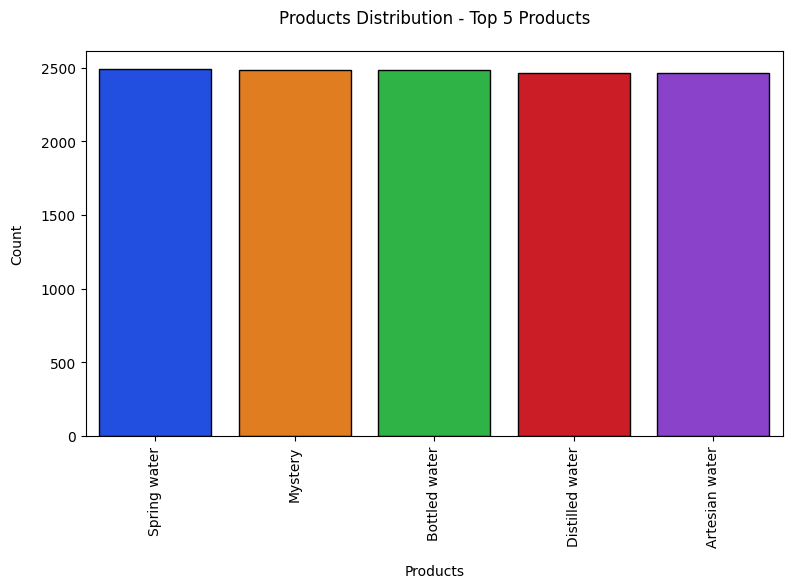

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['products'].value_counts().head(5) , palette = 'bright' , edgecolor = 'black')

plt.title('Products Distribution - Top 5 Products', pad= 20)
plt.xlabel('Products', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

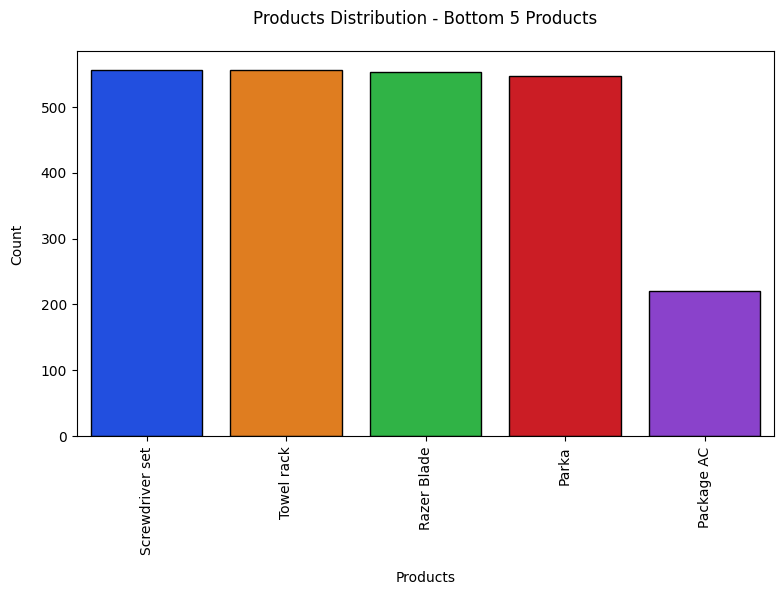

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['products'].value_counts().tail(5) , palette = 'bright' , edgecolor = 'black')

plt.title('Products Distribution - Bottom 5 Products', pad= 20)
plt.xlabel('Products', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

In [ ]:
# Transactions & Operations → shows how they buy.

In [ ]:
retail['Shipping_Method'].value_counts()

Shipping_Method
Same-Day    103684
Express     101896
Standard     94736
Name: count, dtype: int64

In [ ]:
retail['Shipping_Method'].value_counts(normalize=True) * 100

Shipping_Method
Same-Day    34.524967
Express     33.929594
Standard    31.545439
Name: proportion, dtype: float64

In [ ]:
retail['Payment_Method'].value_counts()

Payment_Method
Credit Card    89690
Debit Card     76454
Cash           73491
PayPal         60720
Name: count, dtype: int64

In [ ]:
retail['Payment_Method'].value_counts(normalize=True) * 100

Payment_Method
Credit Card    29.861331
Debit Card     25.454545
Cash           24.468046
PayPal         20.216078
Name: proportion, dtype: float64

In [ ]:
retail['Order_Status'].value_counts()

Order_Status
Delivered     129879
Shipped        64724
Processing     56941
Pending        48873
Name: count, dtype: int64

In [ ]:
retail['Order_Status'].value_counts(normalize=True) * 100

Order_Status
Delivered     43.232906
Shipped       21.544720
Processing    18.953987
Pending       16.268387
Name: proportion, dtype: float64

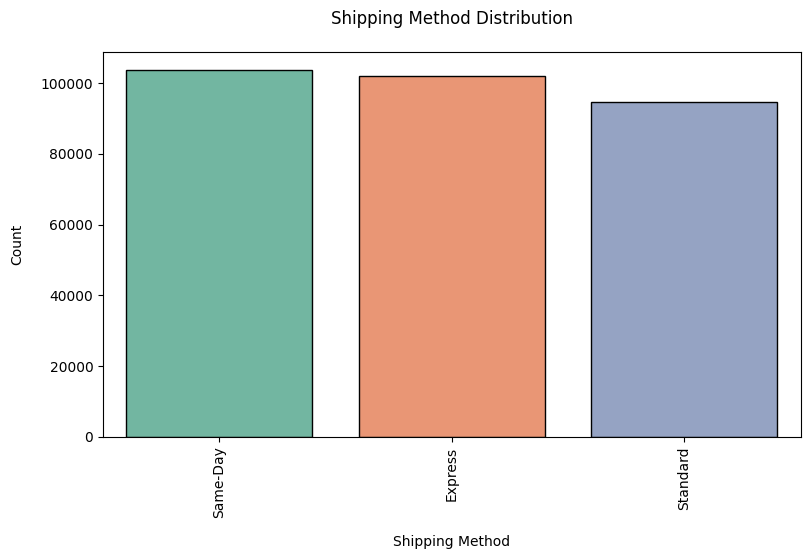

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Shipping_Method'].value_counts() , palette = 'Set2' , edgecolor = 'black')

plt.title('Shipping Method Distribution', pad= 20)
plt.xlabel('Shipping Method', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

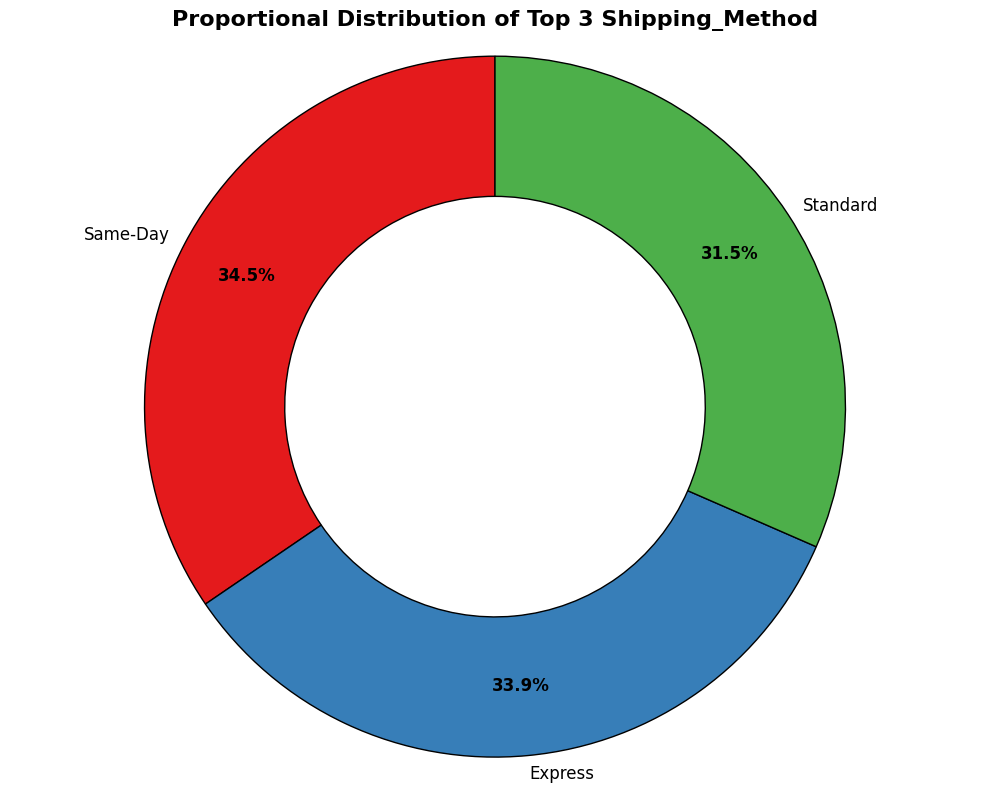

In [ ]:
plot_categorical_donut(retail, 'Shipping_Method', n_categories=3 , figsize=(10,8))

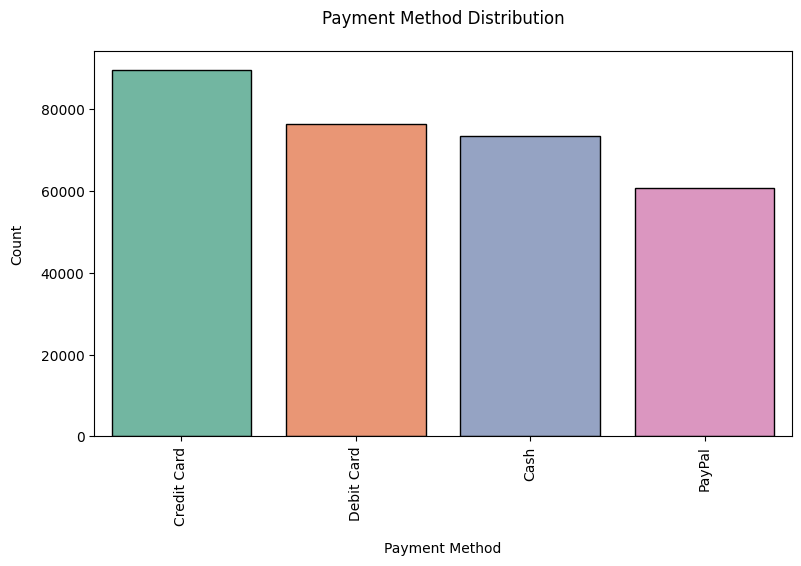

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Payment_Method'].value_counts() , palette = 'Set2' , edgecolor = 'black')

plt.title('Payment Method Distribution', pad= 20)
plt.xlabel('Payment Method', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

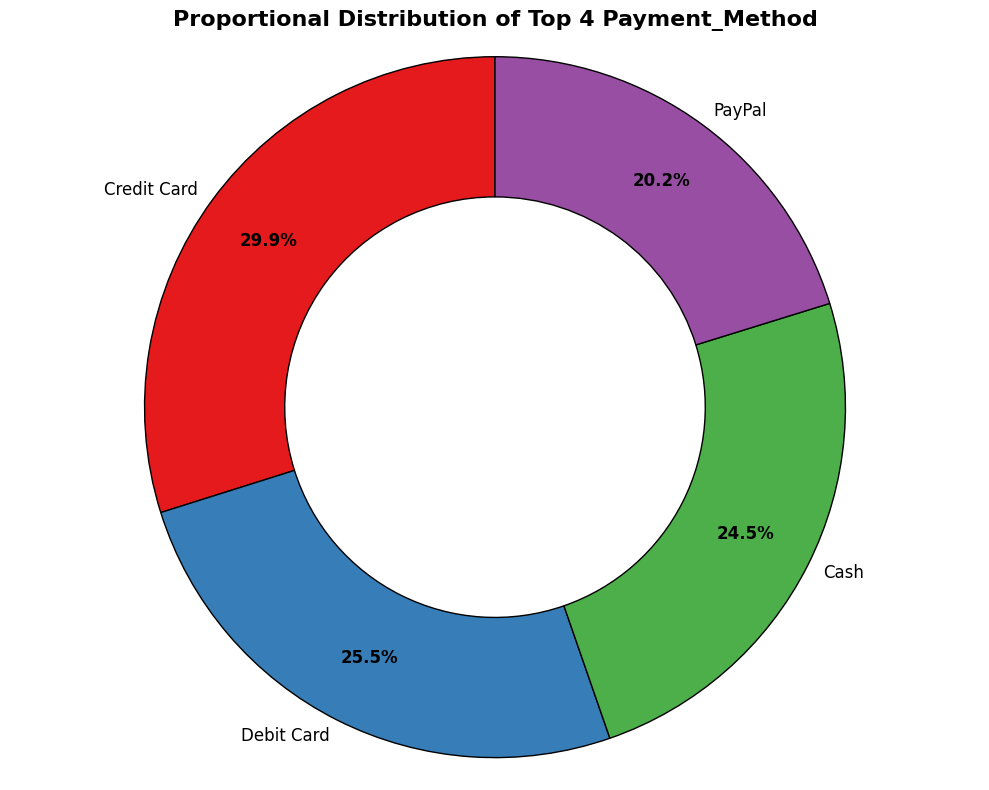

In [ ]:
plot_categorical_donut(retail, 'Payment_Method', n_categories=4 , figsize=(10,8))

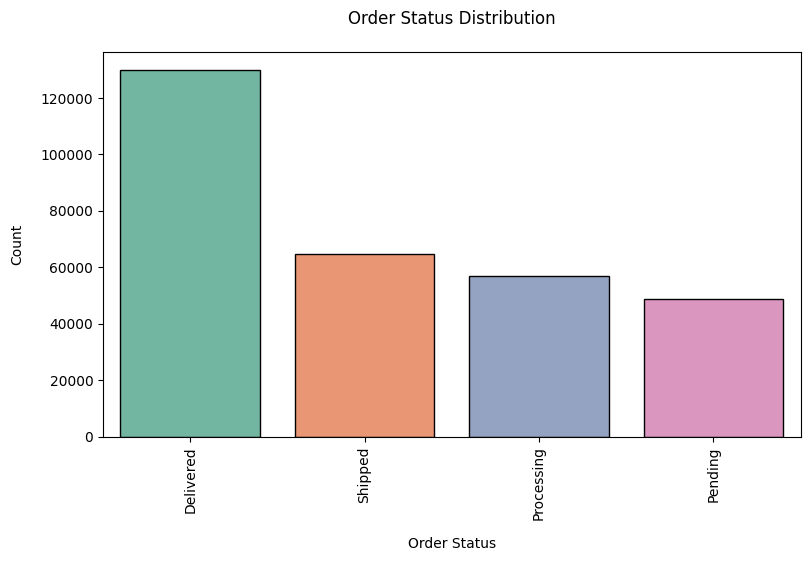

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(retail['Order_Status'].value_counts() , palette = 'Set2' , edgecolor = 'black')

plt.title('Order Status Distribution', pad= 20)
plt.xlabel('Order Status', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

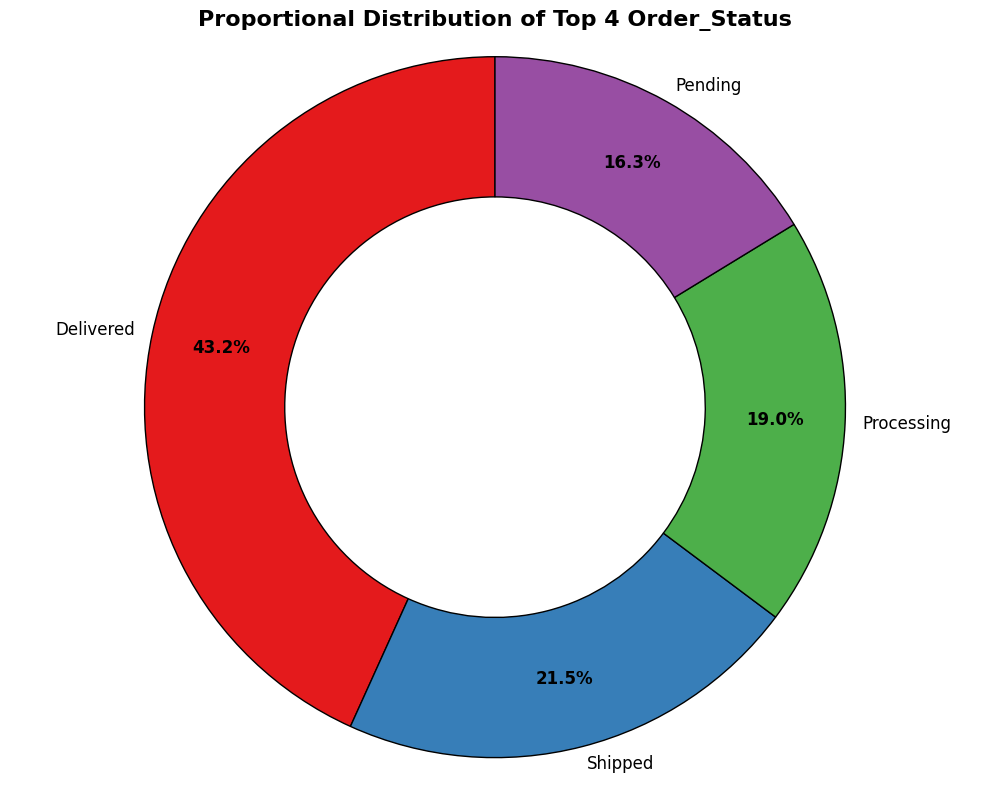

In [ ]:
plot_categorical_donut(retail, 'Order_Status', n_categories=4 , figsize=(10,8))

In [ ]:
# Feedback last → shows what they think about the purchase

In [ ]:
retail['Feedback'].value_counts()

Feedback
Excellent    100279
Good          94683
Average       62404
Bad           43101
Name: count, dtype: int64

In [ ]:
retail['Feedback'].value_counts(normalize=True) * 100

Feedback
Excellent    33.374381
Good         31.511946
Average      20.769003
Bad          14.344670
Name: proportion, dtype: float64

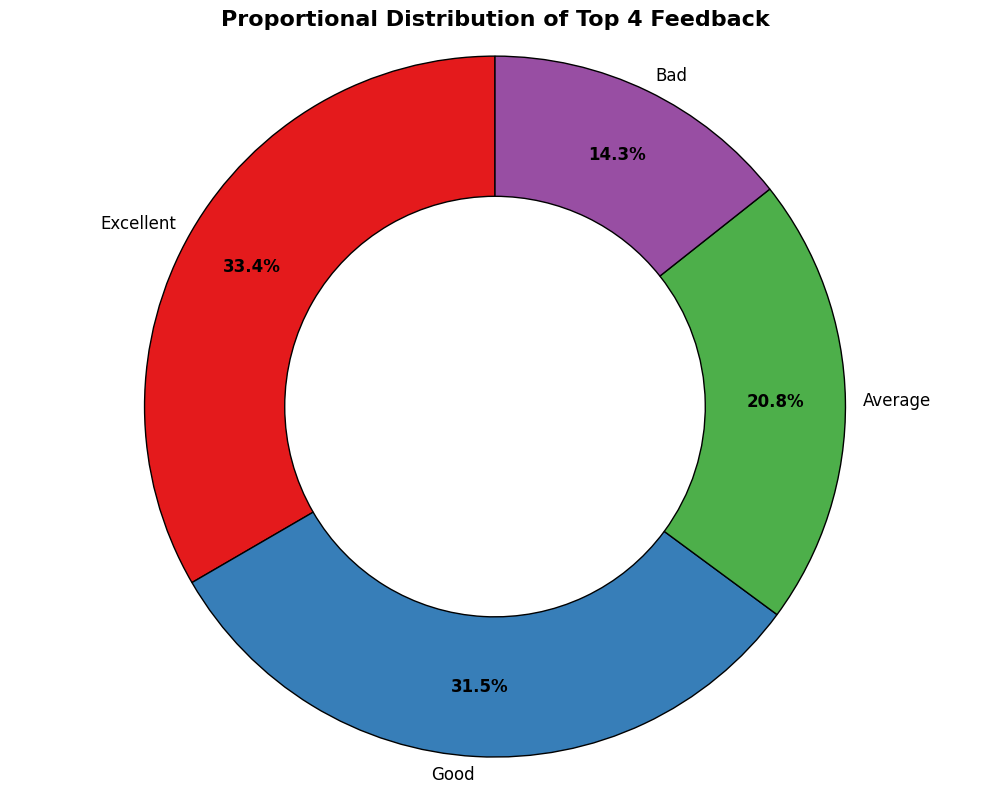

In [ ]:
plot_categorical_donut(retail, 'Feedback', n_categories=4 , figsize=(10,8))

# **Bivariate**

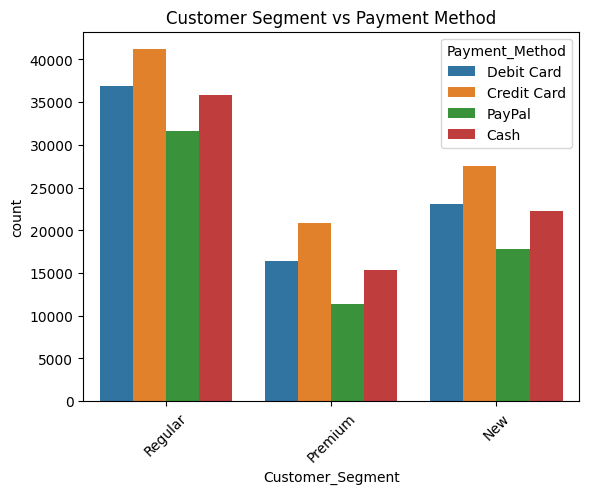

In [ ]:
sns.countplot(data=retail, x="Customer_Segment", hue="Payment_Method")
plt.xticks(rotation=45)
plt.title("Customer Segment vs Payment Method")
plt.show()

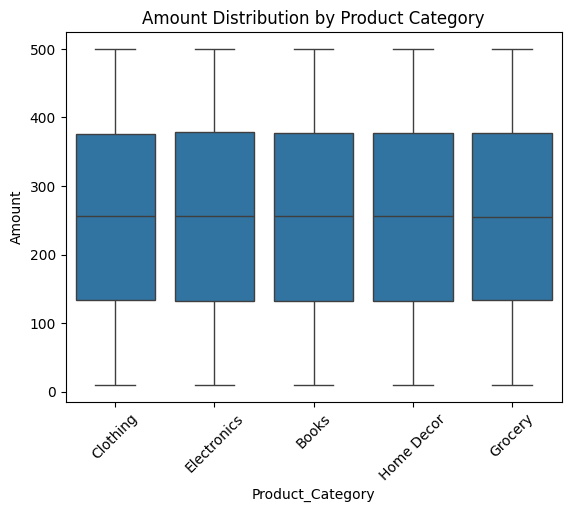

In [ ]:
sns.boxplot(data=retail, x="Product_Category", y="Amount")
plt.xticks(rotation=45)
plt.title("Amount Distribution by Product Category")
plt.show()

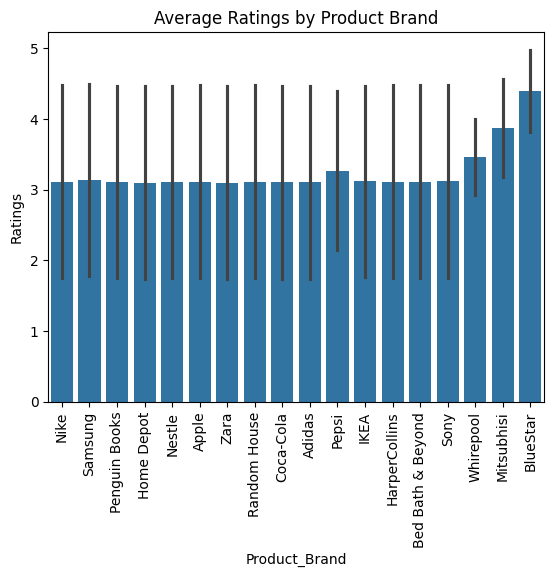

In [ ]:
sns.barplot(data=retail, x="Product_Brand", y="Ratings", ci="sd")
plt.xticks(rotation=90)
plt.title("Average Ratings by Product Brand")
plt.show()

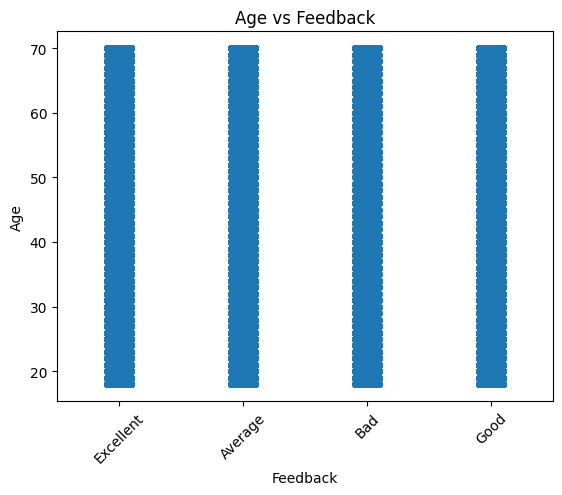

In [ ]:
sns.stripplot(data=retail, x="Feedback", y="Age", jitter=True, alpha=0.5)
plt.xticks(rotation=45)
plt.title("Age vs Feedback")
plt.show()

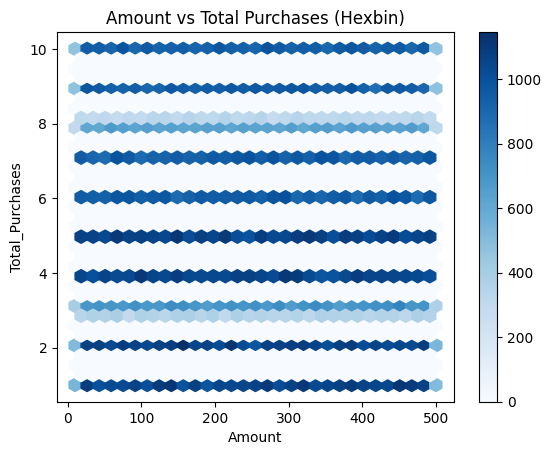

In [ ]:
retail.plot.hexbin(x="Amount", y="Total_Purchases", gridsize=30, cmap="Blues")
plt.title("Amount vs Total Purchases (Hexbin)")
plt.show()

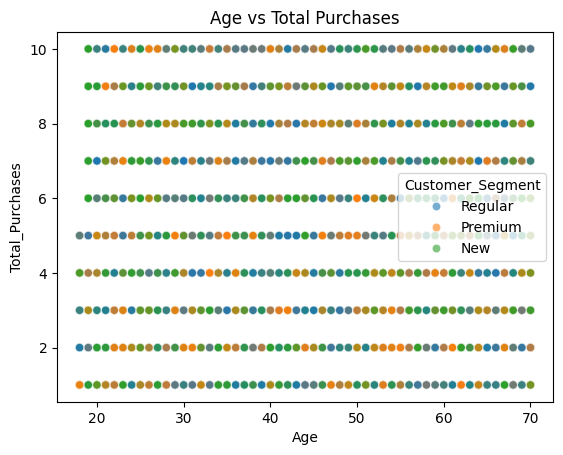

In [ ]:
sns.scatterplot(data=retail, x="Age", y="Total_Purchases", hue="Customer_Segment", alpha=0.6)
plt.title("Age vs Total Purchases")
plt.show()

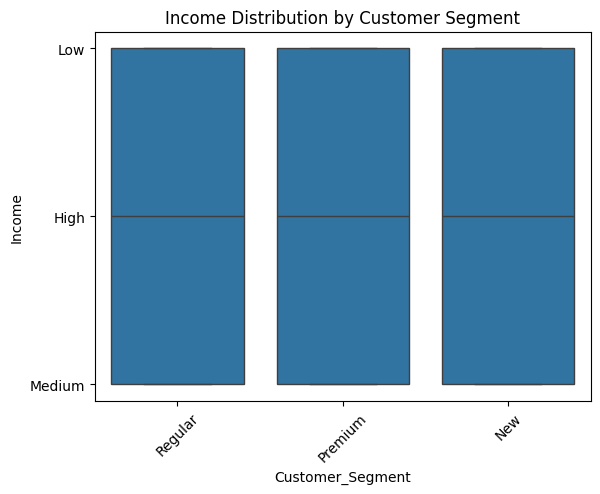

In [ ]:
# Box Plot
sns.boxplot(data=retail, x="Customer_Segment", y="Income")
plt.xticks(rotation=45)
plt.title("Income Distribution by Customer Segment")
plt.show()


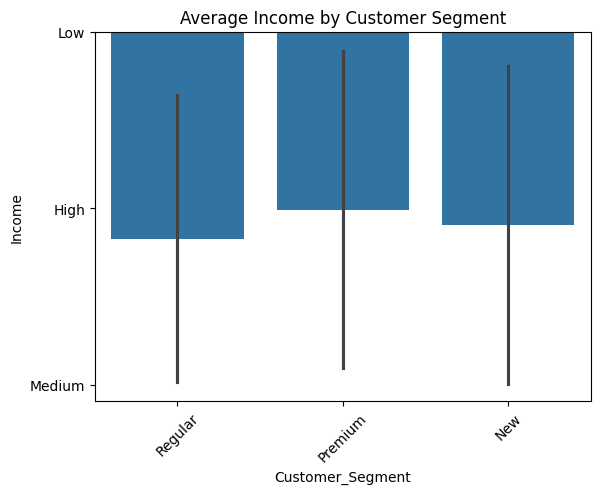

In [ ]:
# Bar Plot (average income per segment)
sns.barplot(data=retail, x="Customer_Segment", y="Income", ci="sd")
plt.xticks(rotation=45)
plt.title("Average Income by Customer Segment")
plt.show()

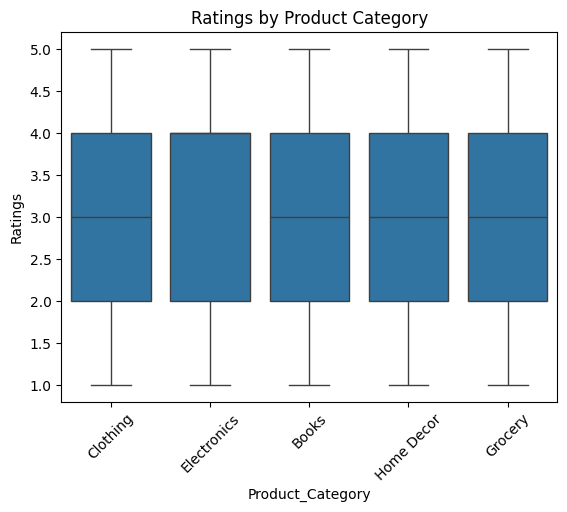

In [ ]:
# Box Plot
sns.boxplot(data=retail, x="Product_Category", y="Ratings")
plt.xticks(rotation=45)
plt.title("Ratings by Product Category")
plt.show()

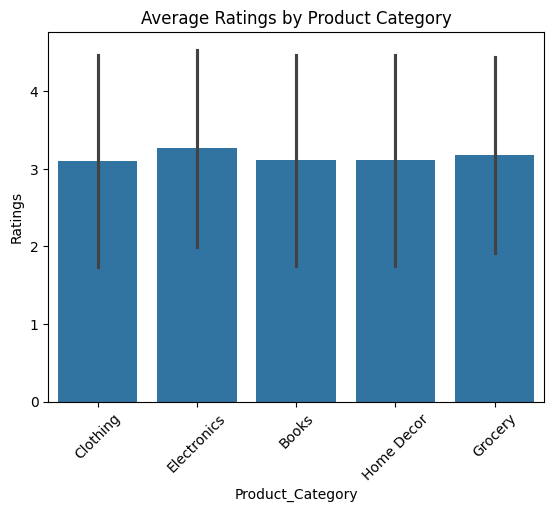

In [ ]:

# Bar Plot (average ratings per category)
sns.barplot(data=retail, x="Product_Category", y="Ratings", ci="sd")
plt.xticks(rotation=45)
plt.title("Average Ratings by Product Category")
plt.show()


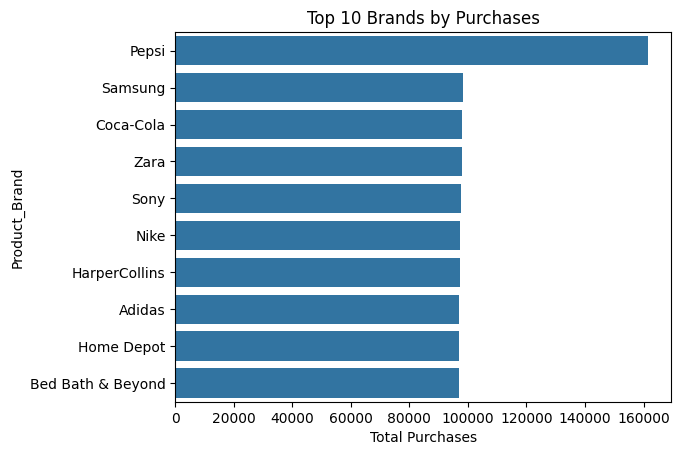

In [18]:
top_brands = retail.groupby("Product_Brand")["Total_Purchases"].sum().nlargest(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands by Purchases")
plt.xlabel("Total Purchases")
plt.show()

# **TOP & BOTOM N**

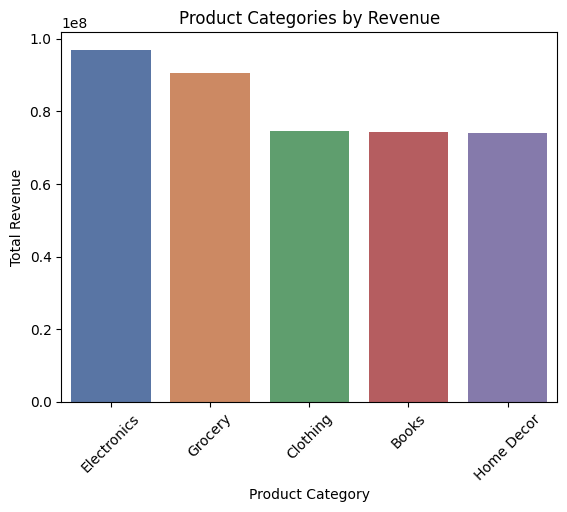

In [30]:
top_categories = retail.groupby("Product_Category")["Total_Amount"].sum().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values , palette= 'deep')
plt.xticks(rotation=45)
plt.title("Product Categories by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Category")
plt.show()

Text(0.5, 0, 'Product Brand')

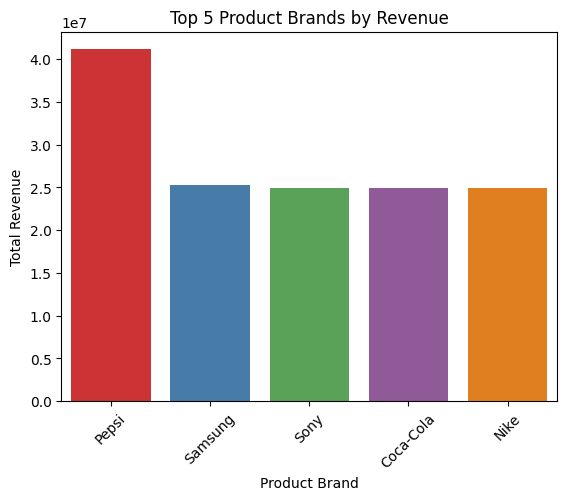

In [31]:
brand_revenue = retail.groupby("Product_Brand")["Total_Amount"].sum().nlargest(5)
sns.barplot(x=brand_revenue.index, y=brand_revenue.values, palette= 'Set1')
plt.xticks(rotation=45)
plt.title("Top 5 Product Brands by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Brand")

Text(0.5, 0, 'Product Type')

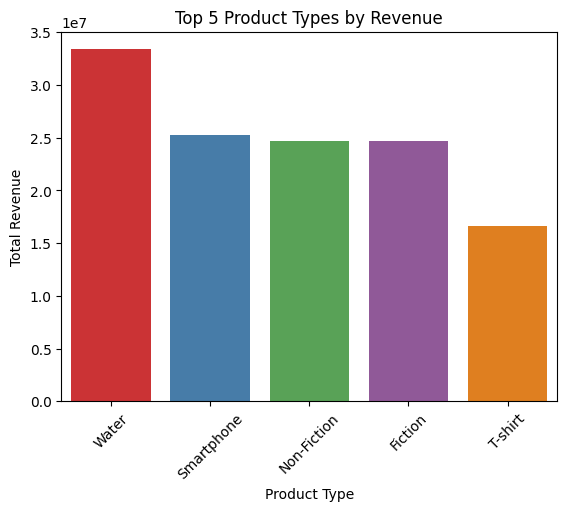

In [32]:
type_revenue = retail.groupby("Product_Type")["Total_Amount"].sum().nlargest(5)
sns.barplot(x=type_revenue.index, y=type_revenue.values, palette= 'Set1')
plt.xticks(rotation=45)
plt.title("Top 5 Product Types by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Type")

Text(0.5, 0, 'Product Brand')

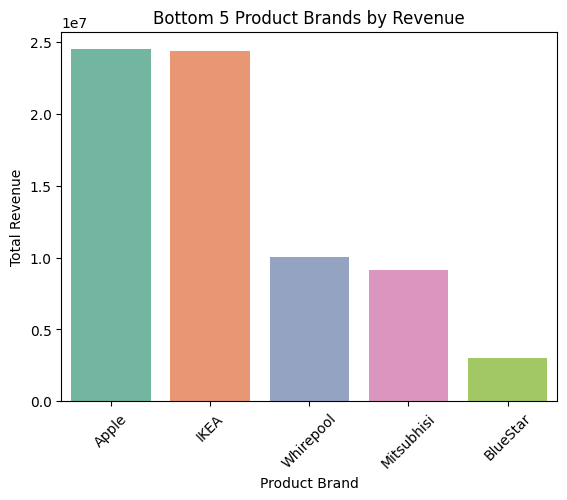

In [33]:
brand_revenue_bottom = retail.groupby("Product_Brand")["Total_Amount"].sum().nsmallest(5).sort_values(ascending=False)
sns.barplot(x=brand_revenue_bottom.index, y=brand_revenue_bottom.values, palette= 'Set2')
plt.xticks(rotation=45)
plt.title("Bottom 5 Product Brands by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Brand")

Text(0.5, 0, 'Product Type')

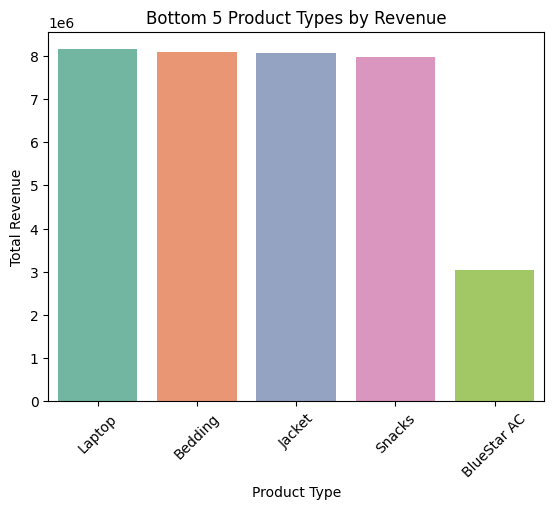

In [34]:
type_revenue_bottom = retail.groupby("Product_Type")["Total_Amount"].sum().nsmallest(5).sort_values(ascending=False)
sns.barplot(x=type_revenue_bottom.index, y=type_revenue_bottom.values, palette= 'Set2')
plt.xticks(rotation=45)
plt.title("Bottom 5 Product Types by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Type")

Text(0.5, 0, 'Product Brand')

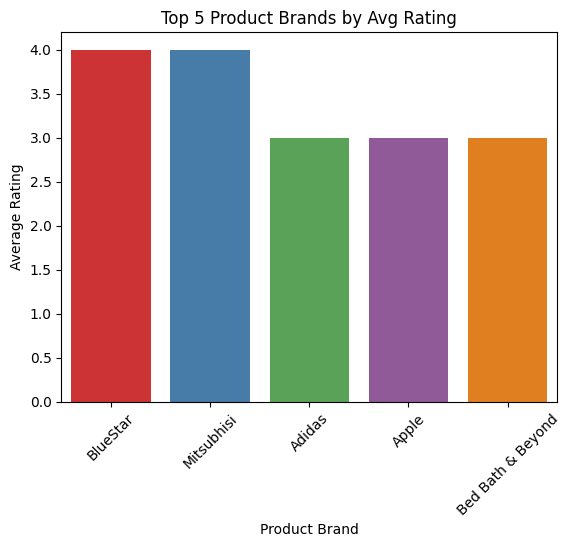

In [37]:
brand_top_ratings = (retail.groupby("Product_Brand")["Ratings"].median().nlargest(5).sort_values(ascending=False))
sns.barplot(x=brand_top_ratings.index, y=brand_top_ratings.values, palette = 'Set1')
plt.xticks(rotation=45)
plt.title("Top 5 Product Brands by Avg Rating")
plt.ylabel("Average Rating")
plt.xlabel("Product Brand")

Text(0.5, 0, 'Product Brand')

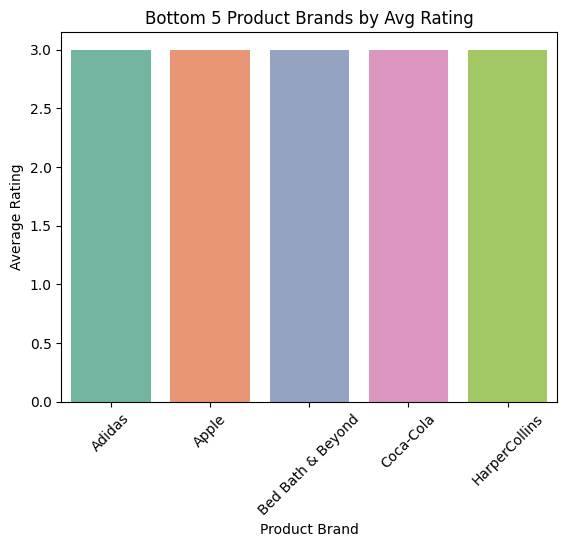

In [39]:
brand_bottom_ratings = (retail.groupby("Product_Brand")["Ratings"].median().nsmallest(5).sort_values(ascending=False))
sns.barplot(x=brand_bottom_ratings.index, y=brand_bottom_ratings.values, palette = 'Set2')
plt.xticks(rotation=45)
plt.title("Bottom 5 Product Brands by Avg Rating")
plt.ylabel("Average Rating")
plt.xlabel("Product Brand")

# **Timeseries**

In [61]:
monthly_revenue = retail.groupby(pd.Grouper(key="Date", freq="M"))["Total_Amount"].sum().sort_index()

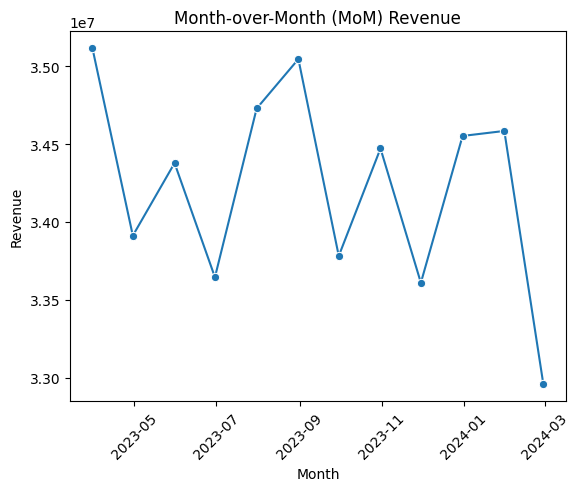

In [68]:
monthly_revenue_mom = monthly_revenue

sns.lineplot(x=monthly_revenue_mom.index, y=monthly_revenue_mom.values, marker="o")
plt.title("Month-over-Month (MoM) Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

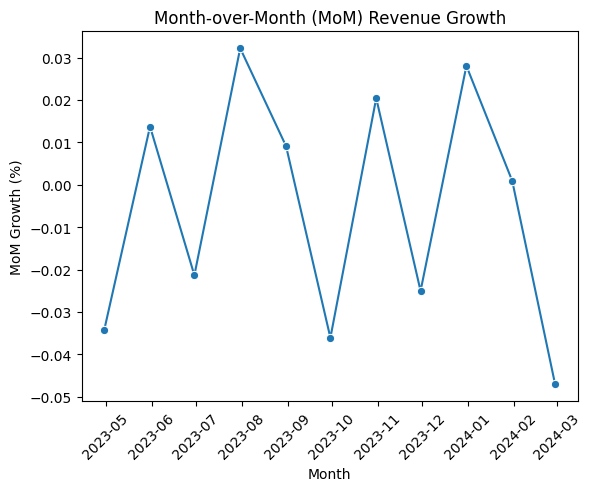

In [64]:
monthly_revenue_mom = monthly_revenue.pct_change() * 100

sns.lineplot(x=monthly_revenue_mom.index, y=monthly_revenue_mom.values, marker="o")
plt.title("Month-over-Month (MoM) Revenue Growth")
plt.ylabel("MoM Growth (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

In [69]:
quarterly_revenue = monthly_revenue.resample("Q").sum()

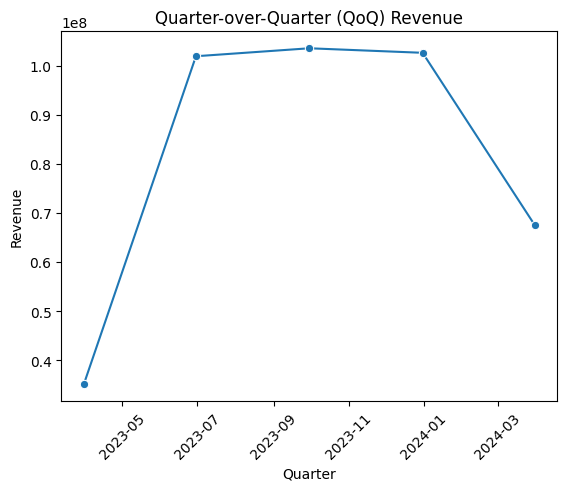

In [75]:
quarterly_revenue_qoq = quarterly_revenue

sns.lineplot(x=quarterly_revenue_qoq.index, y=quarterly_revenue_qoq.values, marker="o")
plt.title("Quarter-over-Quarter (QoQ) Revenue")
plt.ylabel("Revenue")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.show()

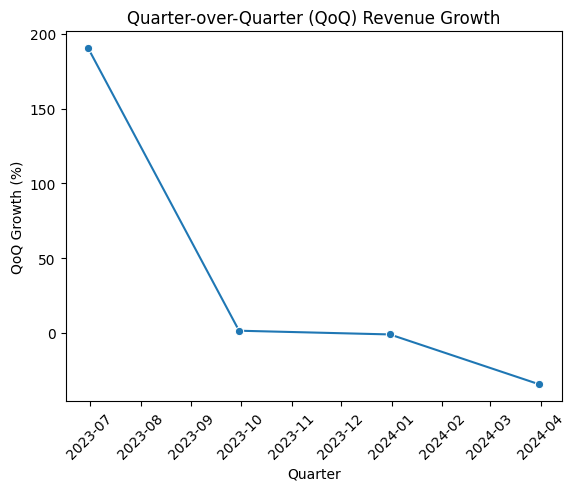

In [76]:
quarterly_revenue_qoq = quarterly_revenue.pct_change() * 100

sns.lineplot(x=quarterly_revenue_qoq.index, y=quarterly_revenue_qoq.values, marker="o")
plt.title("Quarter-over-Quarter (QoQ) Revenue Growth")
plt.ylabel("QoQ Growth (%)")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.show()

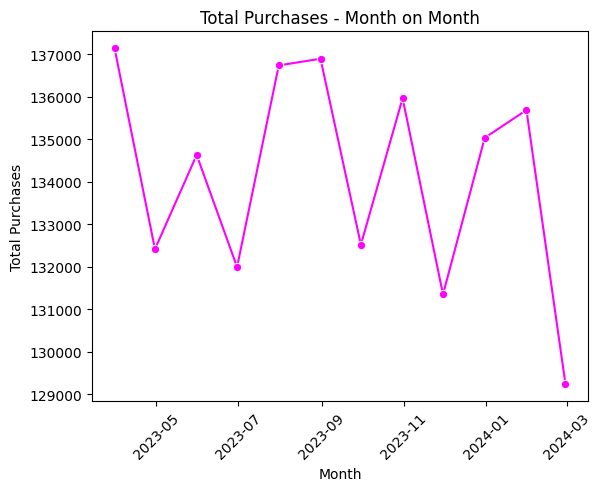

In [77]:
monthly_purchases = retail.groupby(pd.Grouper(key="Date", freq="M"))["Total_Purchases"].sum().sort_index()

sns.lineplot(x=monthly_purchases.index, y=monthly_purchases.values, marker="o", color="magenta")
plt.title("Total Purchases - Month on Month")
plt.ylabel("Total Purchases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

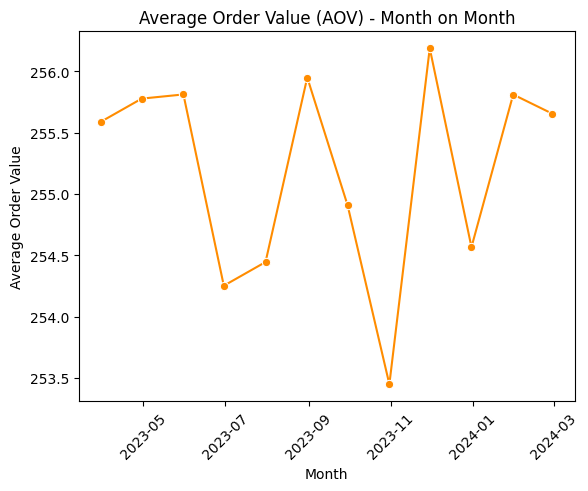

In [78]:
monthly_aov = retail.groupby(pd.Grouper(key="Date", freq="M"))["Amount"].mean().sort_index()

sns.lineplot(x=monthly_aov.index, y=monthly_aov.values, marker="o", color="darkorange")
plt.title("Average Order Value (AOV) - Month on Month")
plt.ylabel("Average Order Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

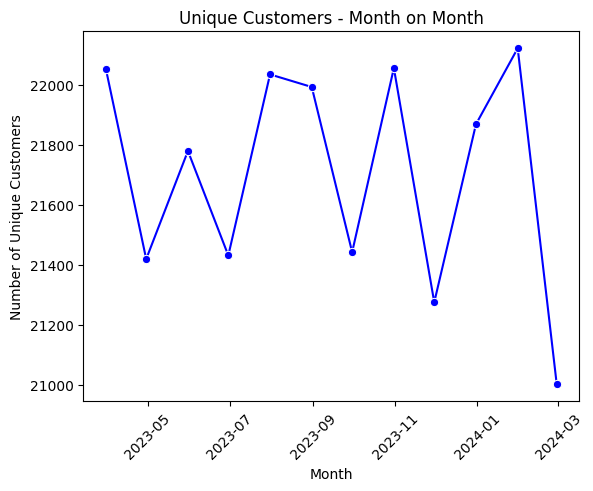

In [79]:
monthly_customers = retail.groupby(pd.Grouper(key="Date", freq="M"))["Customer_ID"].nunique()
sns.lineplot(x=monthly_customers.index, y=monthly_customers.values, marker="o", color="blue")
plt.title("Unique Customers - Month on Month")
plt.ylabel("Number of Unique Customers")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

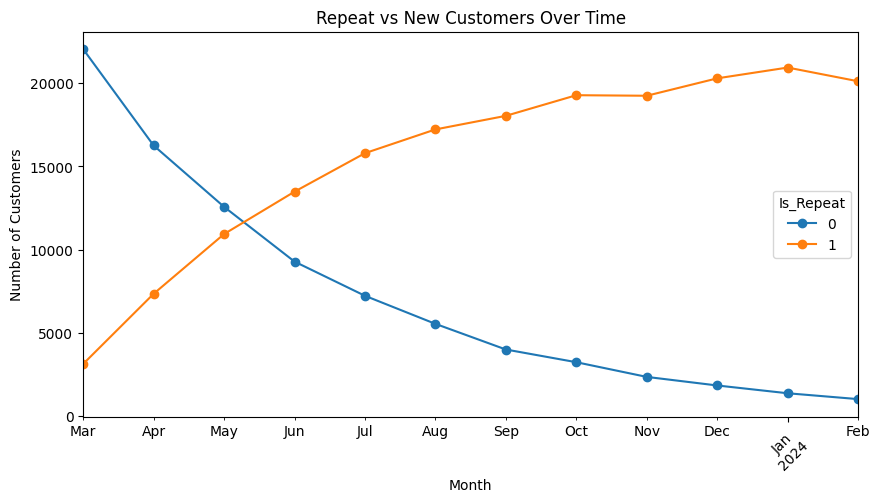

In [83]:
# Sort by customer and date
df = retail.sort_values(["Customer_ID", "Date"])

# Create Is_Repeat column: 0 = first purchase, 1 = repeat purchase
df["Is_Repeat"] = df.duplicated(subset=["Customer_ID"]).astype(int)

monthly_repeat = df.groupby([pd.Grouper(key="Date", freq="M"), "Is_Repeat"])["Customer_ID"].nunique().unstack(fill_value=0)
monthly_repeat.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Repeat vs New Customers Over Time")
plt.ylabel("Number of Customers")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

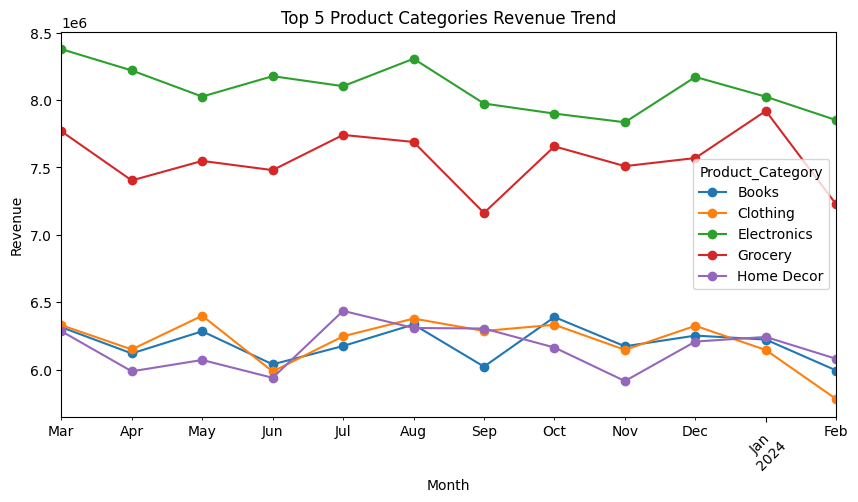

In [84]:
top_categories = retail.groupby("Product_Category")["Total_Amount"].sum().nlargest(5).index
monthly_category = retail[retail["Product_Category"].isin(top_categories)].groupby([pd.Grouper(key="Date", freq="M"), "Product_Category"])["Total_Amount"].sum().unstack()
monthly_category.plot(figsize=(10,5), marker="o")
plt.title("Top 5 Product Categories Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

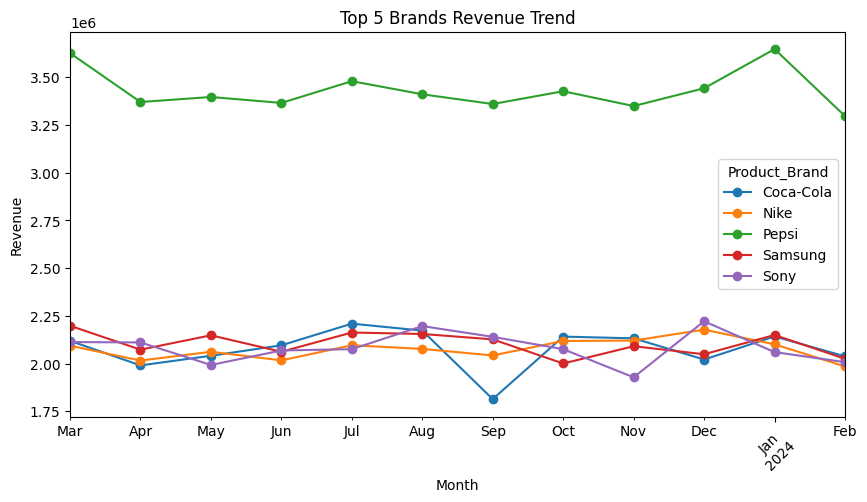

In [85]:
top_brands = retail.groupby("Product_Brand")["Total_Amount"].sum().nlargest(5).index
monthly_brands = retail[retail["Product_Brand"].isin(top_brands)].groupby([pd.Grouper(key="Date", freq="M"), "Product_Brand"])["Total_Amount"].sum().unstack()
monthly_brands.plot(figsize=(10,5), marker="o")
plt.title("Top 5 Brands Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

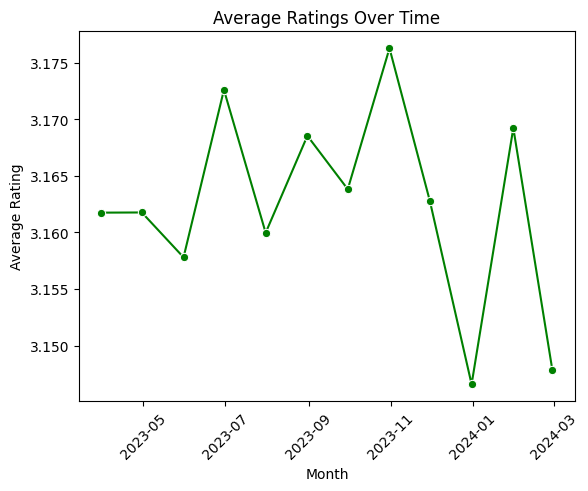

In [86]:
monthly_ratings = retail.groupby(pd.Grouper(key="Date", freq="M"))["Ratings"].mean()
sns.lineplot(x=monthly_ratings.index, y=monthly_ratings.values, marker="o", color="green")
plt.title("Average Ratings Over Time")
plt.ylabel("Average Rating")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

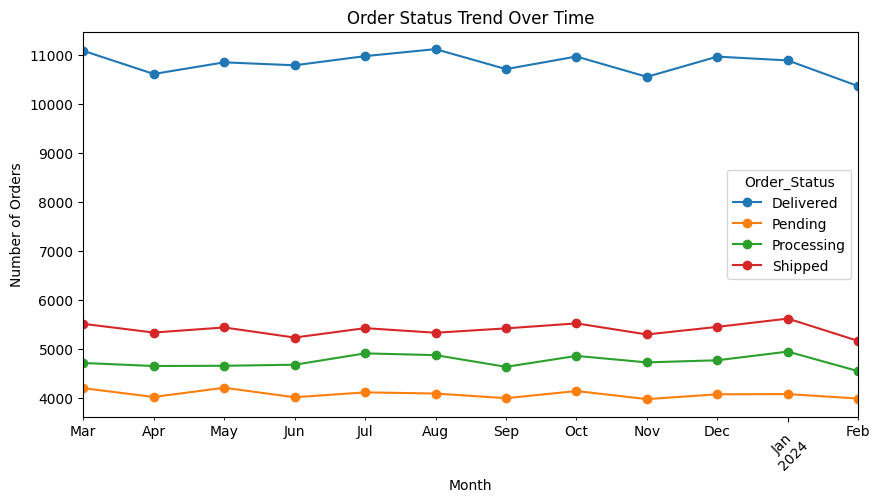

In [87]:
monthly_order_status = retail.groupby([pd.Grouper(key="Date", freq="M"), "Order_Status"])["Customer_ID"].count().unstack(fill_value=0)
monthly_order_status.plot(figsize=(10,5), marker="o")
plt.title("Order Status Trend Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# **Multivariate**

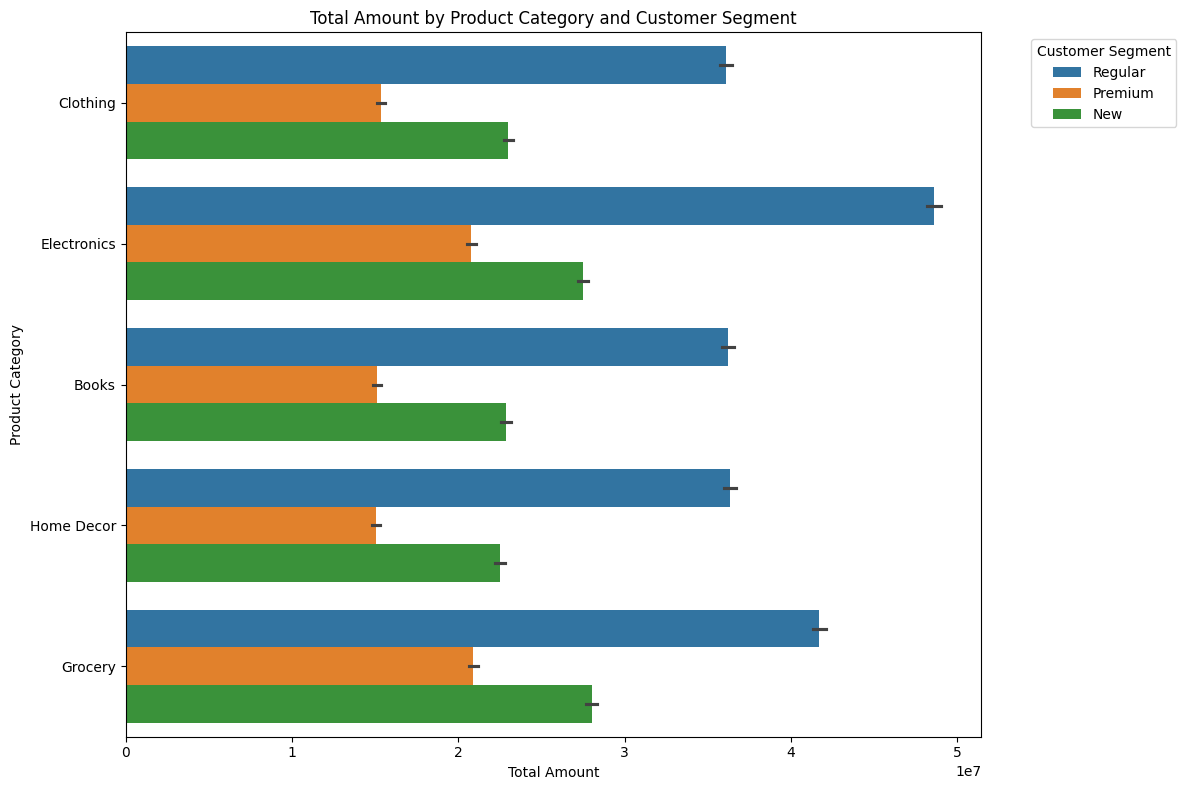

In [88]:
plt.figure(figsize=(12, 8))
sns.barplot(data=retail,y='Product_Category',x='Total_Amount',hue='Customer_Segment',estimator=sum)
plt.title('Total Amount by Product Category and Customer Segment')
plt.xlabel('Total Amount')
plt.ylabel('Product Category')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


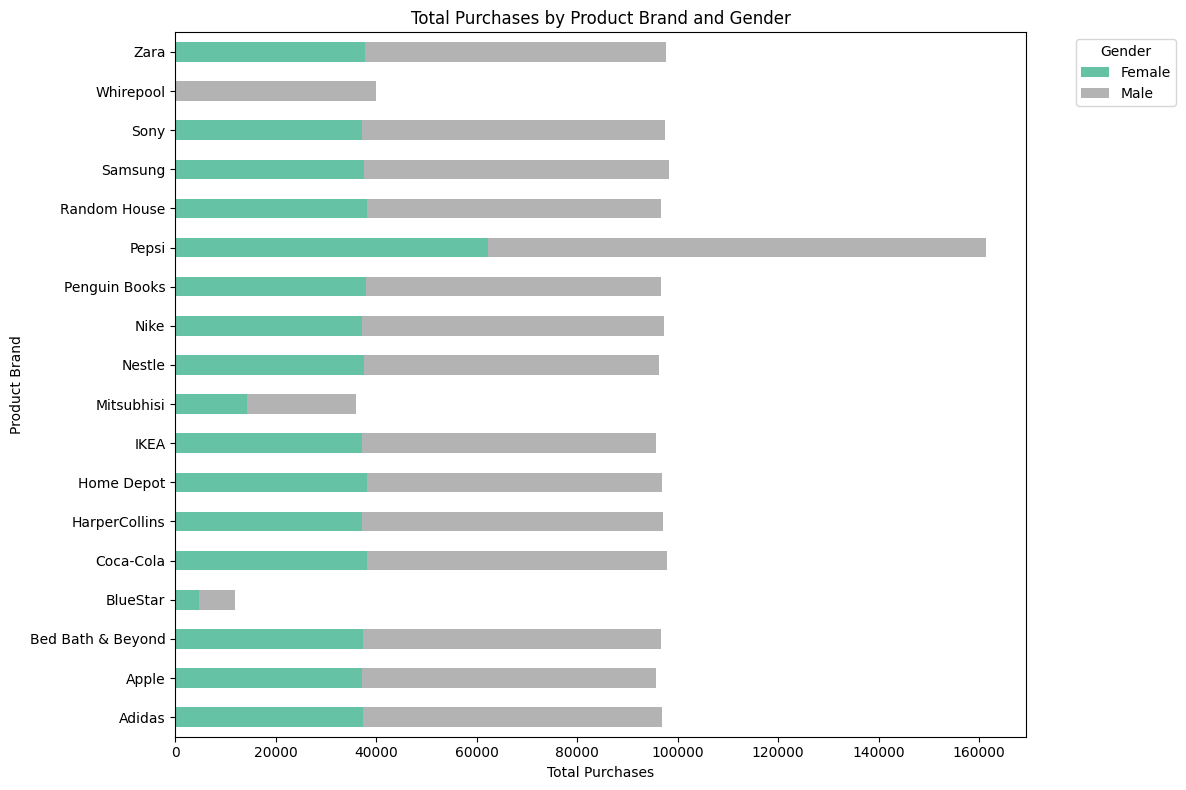

In [89]:
# Pivot table
pivot_df = retail.pivot_table(index='Product_Brand',columns='Gender',values='Total_Purchases',aggfunc='sum',fill_value=0)
pivot_df.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Total Purchases by Product Brand and Gender')
plt.xlabel('Total Purchases')
plt.ylabel('Product Brand')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


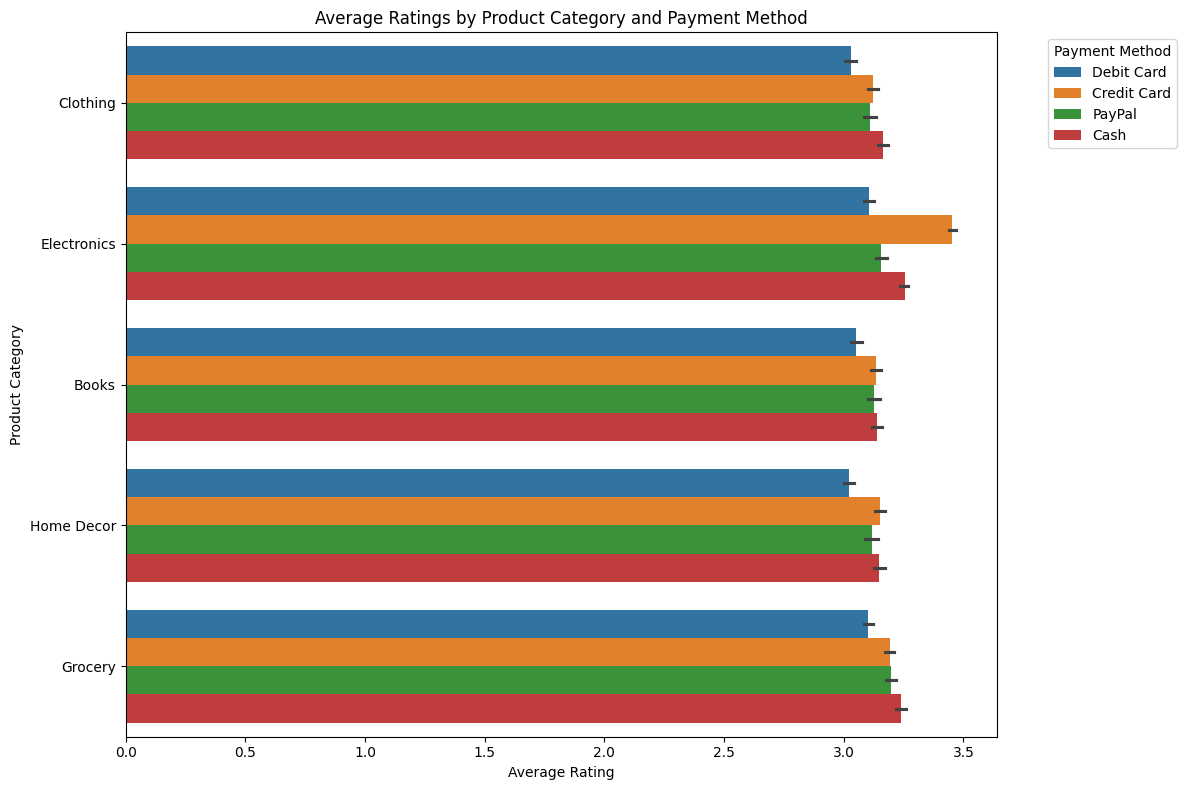

In [90]:
plt.figure(figsize=(12, 8))
sns.barplot(data=retail,y='Product_Category',x='Ratings',hue='Payment_Method',estimator='mean')
plt.title('Average Ratings by Product Category and Payment Method')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


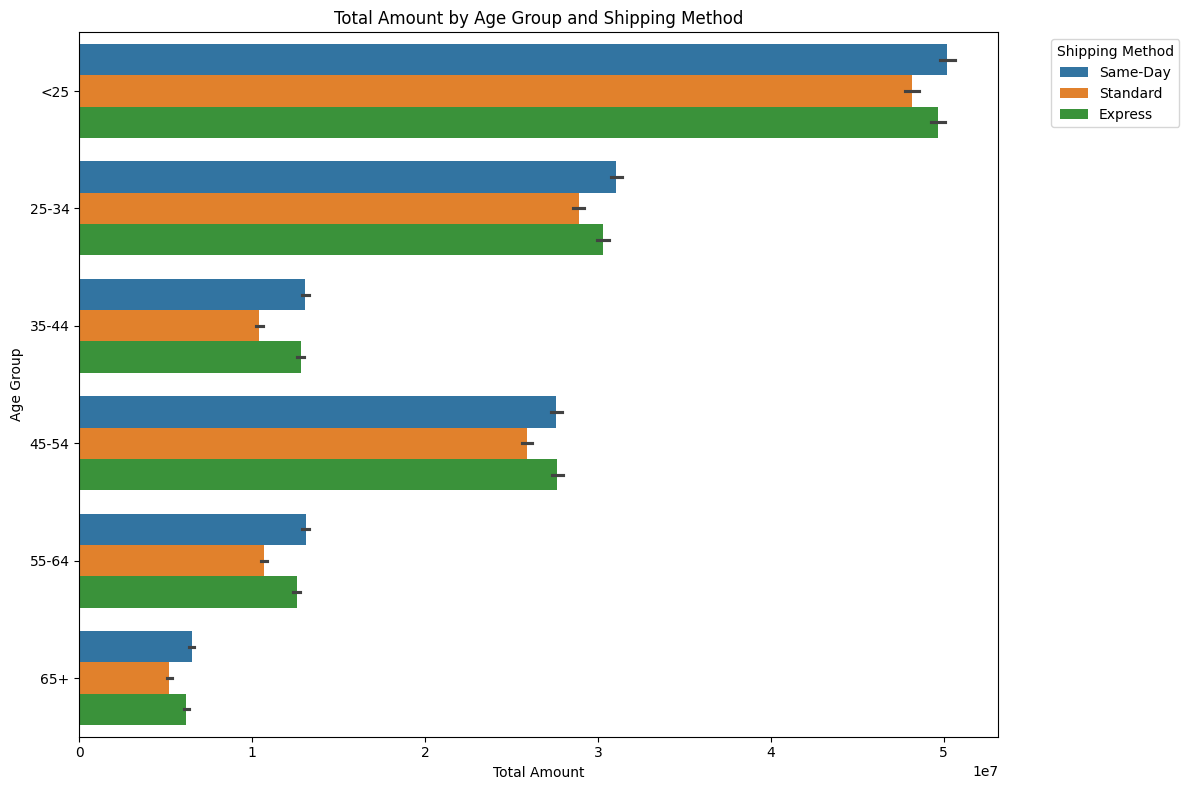

In [96]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
retail['Age_Group'] = pd.cut(retail['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.barplot(data=retail,y='Age_Group',x='Total_Amount',hue='Shipping_Method',estimator=sum)
plt.title('Total Amount by Age Group and Shipping Method')
plt.xlabel('Total Amount')
plt.ylabel('Age Group')
plt.legend(title='Shipping Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


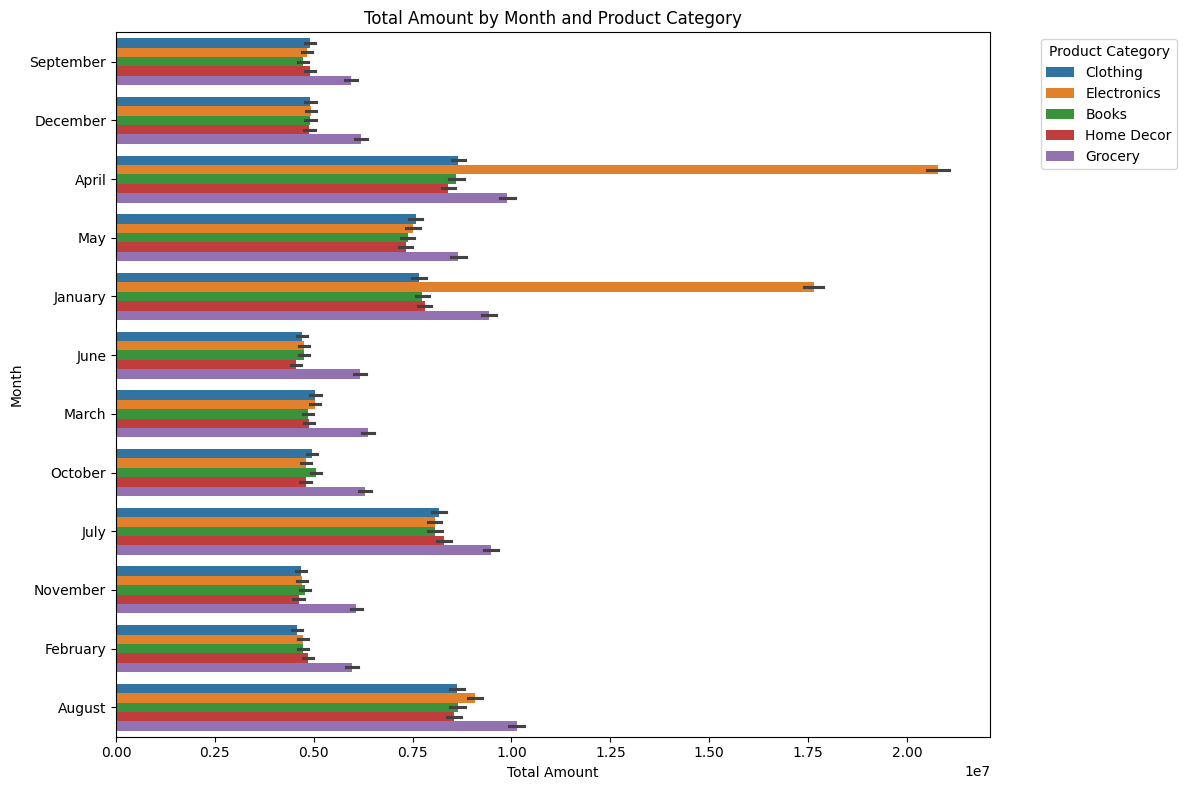

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(data=retail,y='Month',x='Total_Amount',hue='Product_Category',estimator=sum)
plt.title('Total Amount by Month and Product Category')
plt.xlabel('Total Amount')
plt.ylabel('Month')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


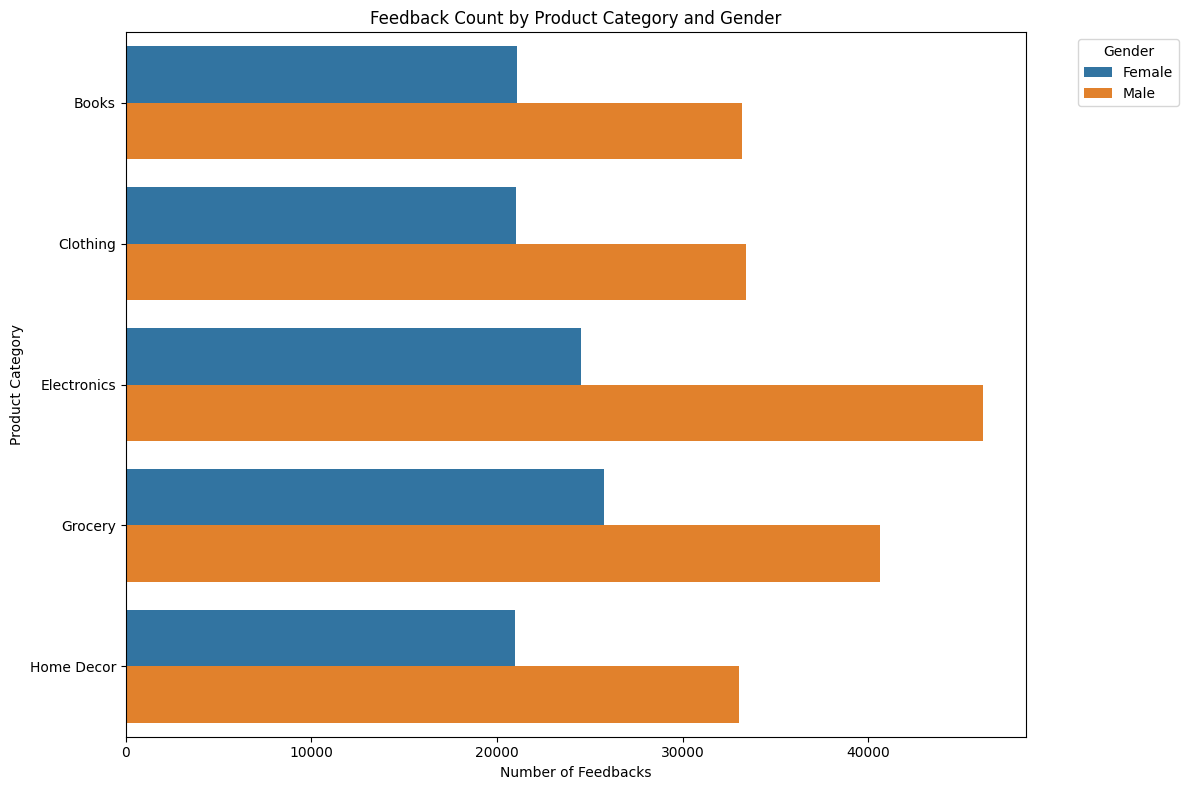

In [98]:
feedback_count = retail.groupby(['Product_Category', 'Gender'])['Feedback'].count().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=feedback_count,y='Product_Category',x='Feedback',hue='Gender')
plt.title('Feedback Count by Product Category and Gender')
plt.xlabel('Number of Feedbacks')
plt.ylabel('Product Category')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


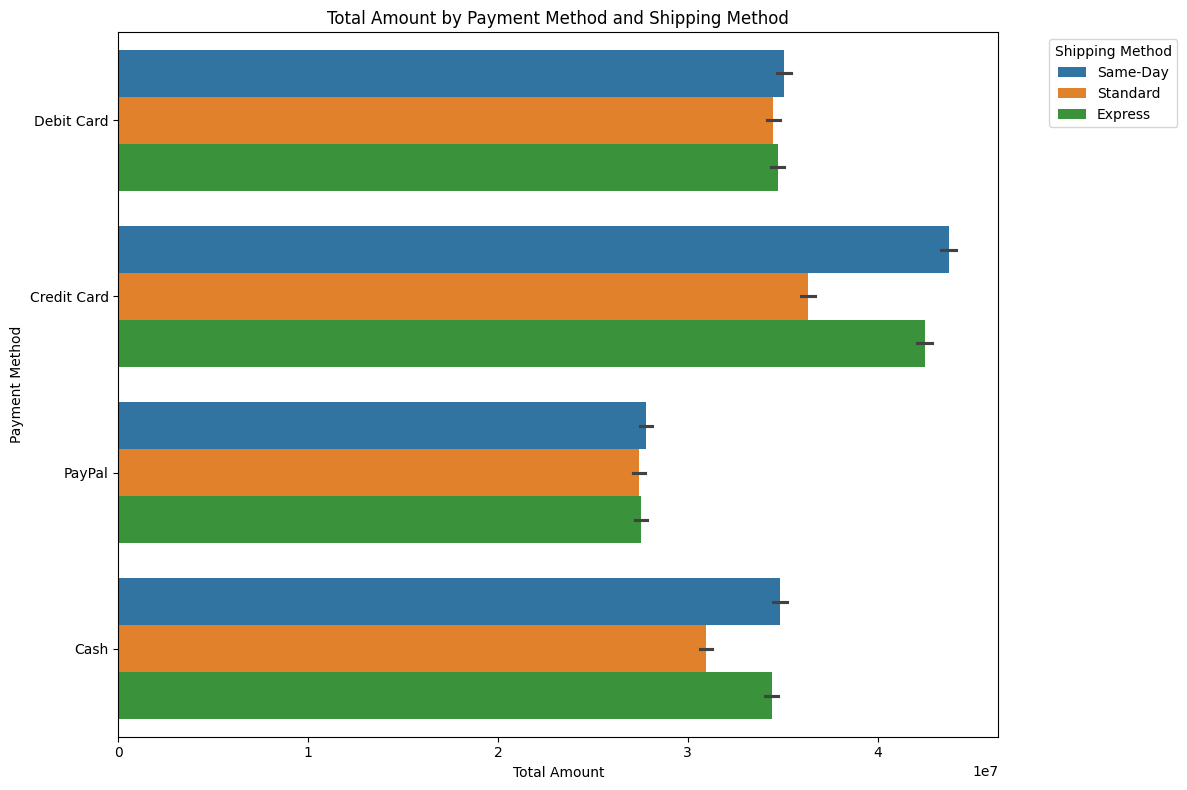

In [99]:
plt.figure(figsize=(12, 8))
sns.barplot(data=retail,y='Payment_Method',x='Total_Amount',hue='Shipping_Method',estimator=sum)
plt.title('Total Amount by Payment Method and Shipping Method')
plt.xlabel('Total Amount')
plt.ylabel('Payment Method')
plt.legend(title='Shipping Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


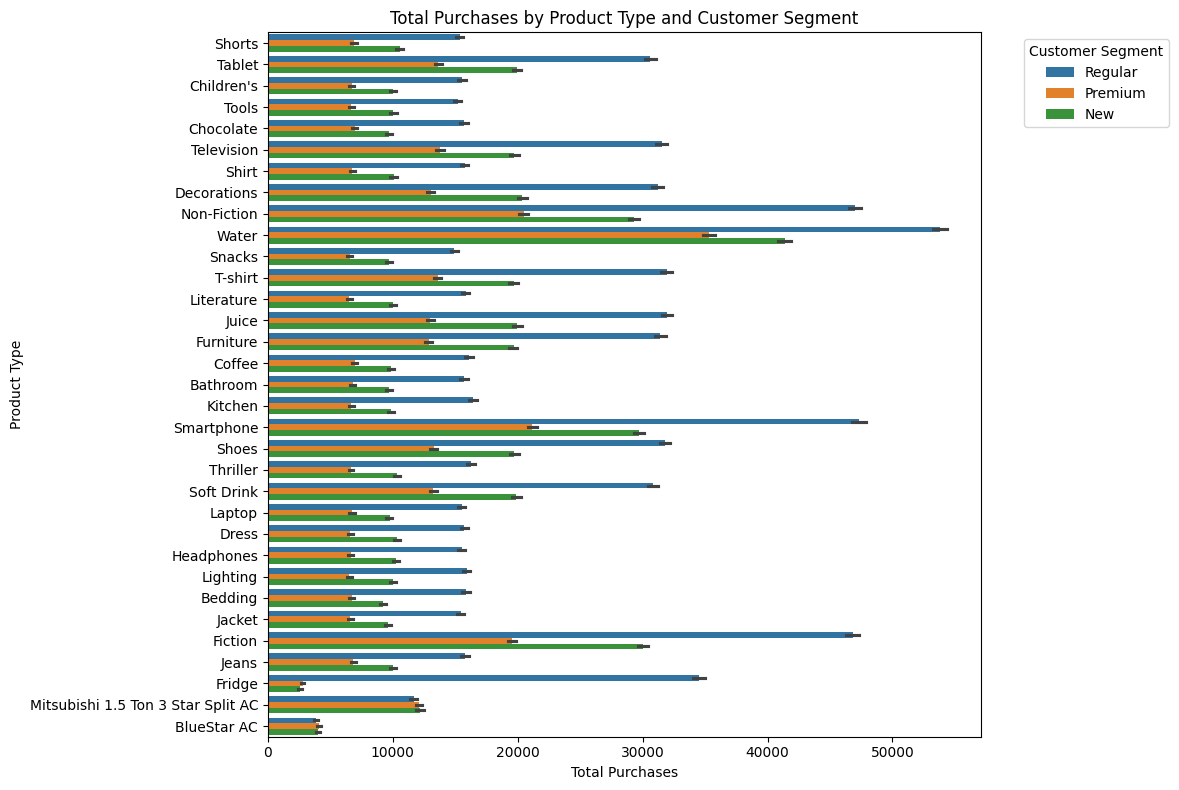

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(data=retail,y='Product_Type',x='Total_Purchases',hue='Customer_Segment',estimator=sum)
plt.title('Total Purchases by Product Type and Customer Segment')
plt.xlabel('Total Purchases')
plt.ylabel('Product Type')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
